In [2]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle
import warnings
warnings.filterwarnings('ignore')

# Set style for professional visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10

print("✅ Libraries imported successfully!")
print(f"📊 Ready to create advanced visualizations!")

✅ Libraries imported successfully!
📊 Ready to create advanced visualizations!


In [3]:
# Load Data
print("Loading datasets...\n")

# Featured dataset
df = pd.read_csv('../data/processed/featured_real_estate_data.csv')
print(f"✅ Main Dataset: {len(df):,} properties loaded")

# Predictions dataset
df_pred = pd.read_csv('../data/processed/final_analysis_with_predictions.csv')
print(f"✅ Predictions Dataset: {len(df_pred):,} records loaded")

# Model comparison
model_results = pd.read_csv('../data/processed/model_comparison_results.csv')
print(f"✅ Model Results: {len(model_results)} models loaded")

# Feature importance
feature_imp = pd.read_csv('../data/processed/feature_importance.csv')
print(f"✅ Feature Importance: {len(feature_imp)} features loaded\n")

print(f"\n📊 Dataset Overview:")
print(f"   Columns: {df.shape[1]}")
print(f"   Price Range: ₹{df['Price_Lakhs'].min():.1f}L - ₹{df['Price_Lakhs'].max():.1f}L")
print(f"   Localities: {df['Locality'].nunique()}")

Loading datasets...

✅ Main Dataset: 2,247 properties loaded
✅ Predictions Dataset: 2,247 records loaded
✅ Model Results: 4 models loaded
✅ Feature Importance: 12 features loaded


📊 Dataset Overview:
   Columns: 30
   Price Range: ₹15.0L - ₹555.0L
   Localities: 1238


## 📊 Visualization 1: Real Estate Market Heatmap
**Business Value**: Shows price density across BHK types and localities

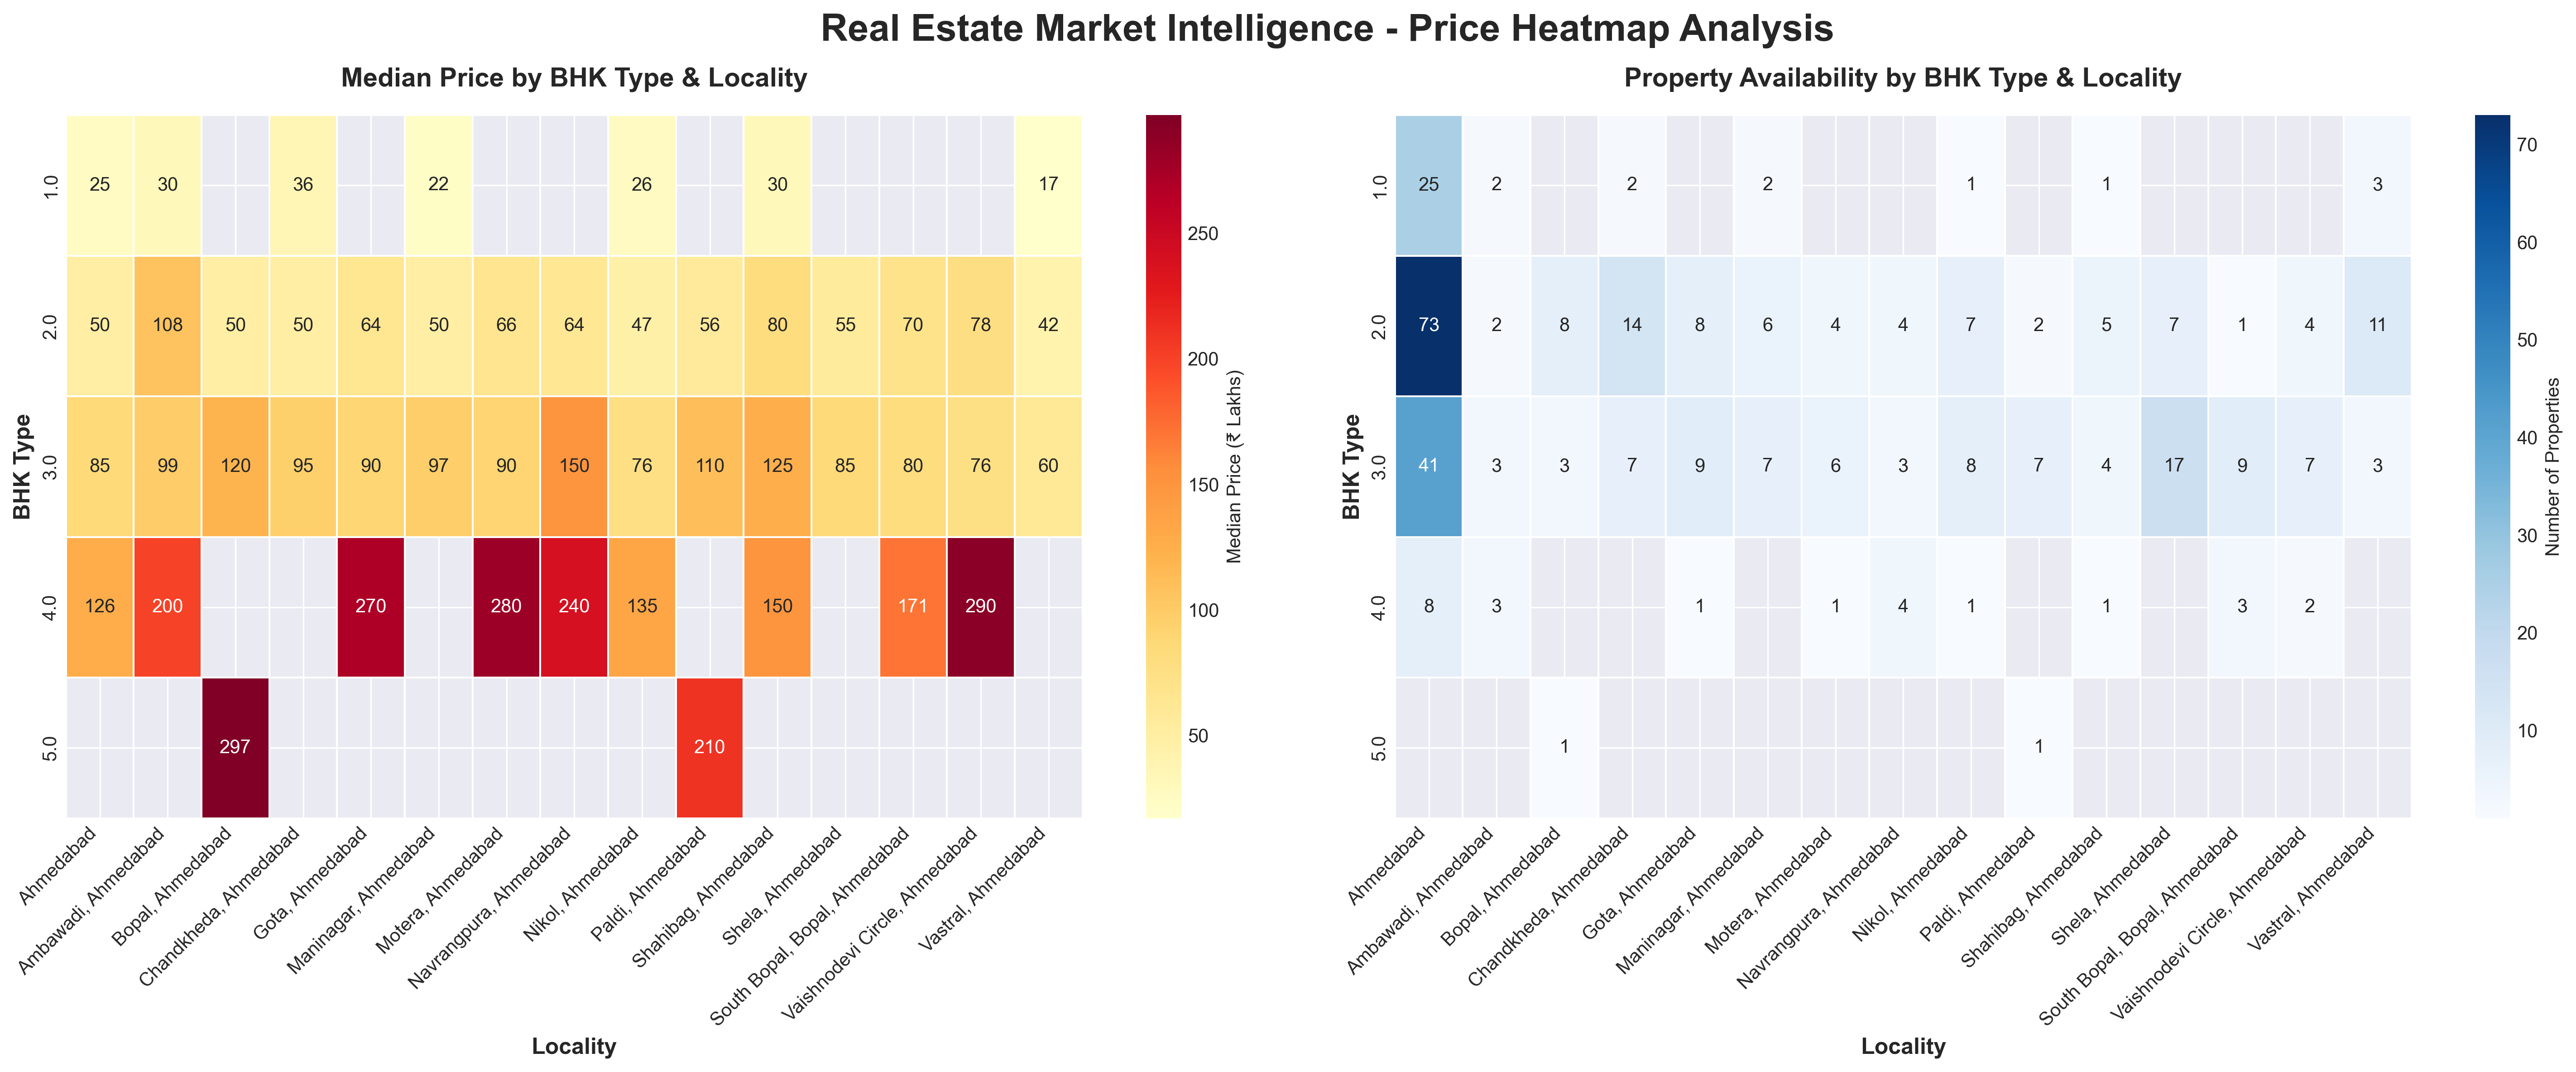


💡 Business Insights:
   ✓ Darker red areas = Premium pricing opportunities
   ✓ Darker blue areas = High inventory/competition
   ✓ Use for competitive pricing strategy


In [3]:
# Create Price Heatmap by BHK and Top Localities
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
fig.suptitle('Real Estate Market Intelligence - Price Heatmap Analysis', fontsize=20, fontweight='bold', y=0.98)

# Top 15 localities by count
top_localities = df['Locality'].value_counts().head(15).index
df_top = df[df['Locality'].isin(top_localities)]

# Panel 1: Average Price Heatmap (BHK vs Locality)
pivot_avg = df_top.pivot_table(values='Price_Lakhs', index='BHK', columns='Locality', aggfunc='median')
sns.heatmap(pivot_avg, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Median Price (₹ Lakhs)'},
            linewidths=0.5, ax=axes[0])
axes[0].set_title('Median Price by BHK Type & Locality', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Locality', fontsize=12, fontweight='bold')
axes[0].set_ylabel('BHK Type', fontsize=12, fontweight='bold')
plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

# Panel 2: Property Count Heatmap
pivot_count = df_top.pivot_table(values='Price_Lakhs', index='BHK', columns='Locality', aggfunc='count')
sns.heatmap(pivot_count, annot=True, fmt='g', cmap='Blues', cbar_kws={'label': 'Number of Properties'},
            linewidths=0.5, ax=axes[1])
axes[1].set_title('Property Availability by BHK Type & Locality', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Locality', fontsize=12, fontweight='bold')
axes[1].set_ylabel('BHK Type', fontsize=12, fontweight='bold')
plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig('../visualizations/master_dashboard/advanced_01_market_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Business Insights:")
print("   ✓ Darker red areas = Premium pricing opportunities")
print("   ✓ Darker blue areas = High inventory/competition")
print("   ✓ Use for competitive pricing strategy")

## 📊 Visualization 2: Investment ROI Analysis
**Business Value**: Identifies best investment opportunities based on price per sqft and appreciation potential

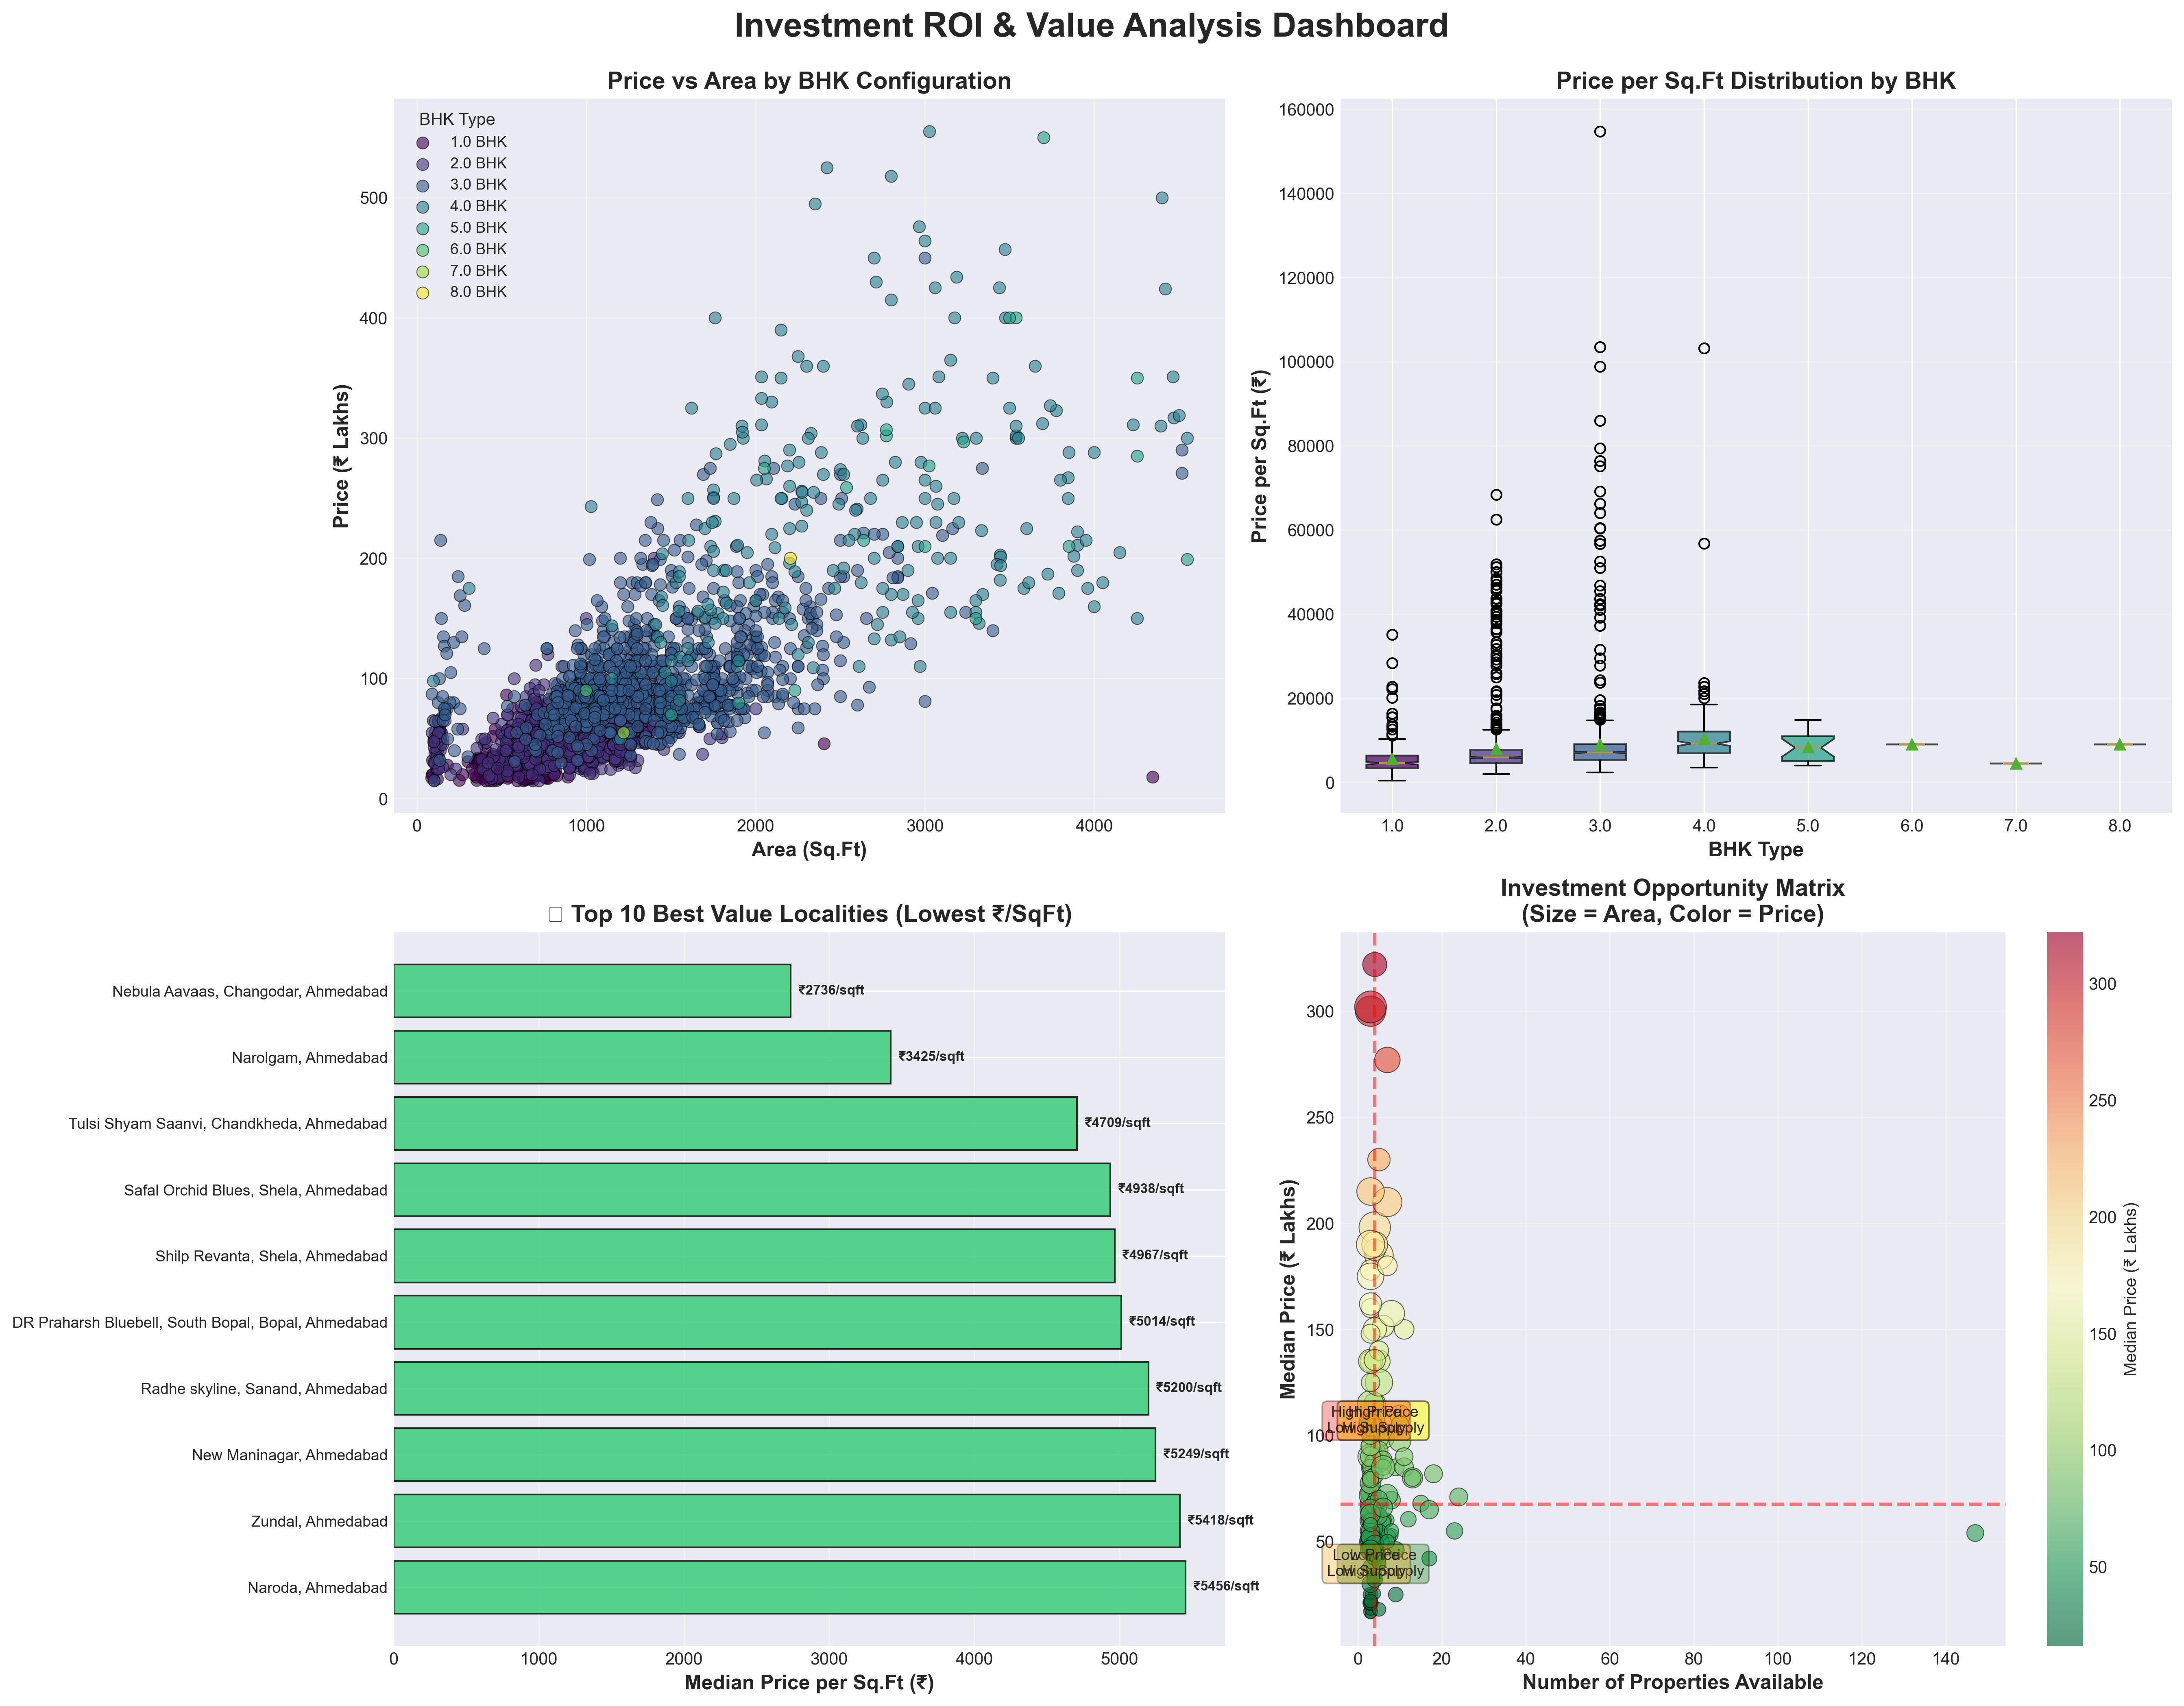


💡 Investment Insights:
   🏆 Best Value Locality: Nebula Aavaas, Changodar, Ahmedabad (₹2736/sqft)
   📊 Green quadrant = Best investment opportunities (low price, high supply)
   📊 Red quadrant = Premium exclusive locations (high price, low supply)


In [4]:
# ROI and Value Analysis
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Investment ROI & Value Analysis Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Calculate additional metrics
df['Price_Per_SqFt'] = df['Price_Lakhs'] * 100000 / df['Area_SqFt']

# Panel 1: Price vs Area Scatter with BHK coloring
bhk_types = sorted(df['BHK'].unique())
colors_bhk = plt.cm.viridis(np.linspace(0, 1, len(bhk_types)))

for bhk, color in zip(bhk_types, colors_bhk):
    bhk_data = df[df['BHK'] == bhk]
    axes[0, 0].scatter(bhk_data['Area_SqFt'], bhk_data['Price_Lakhs'], 
                      alpha=0.6, s=50, c=[color], label=f'{bhk} BHK', edgecolors='black', linewidth=0.5)

axes[0, 0].set_xlabel('Area (Sq.Ft)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Price (₹ Lakhs)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Price vs Area by BHK Configuration', fontsize=14, fontweight='bold')
axes[0, 0].legend(title='BHK Type', loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Panel 2: Price per Sqft Distribution by BHK
bhk_price_per_sqft = [df[df['BHK'] == bhk]['Price_Per_SqFt'].values for bhk in bhk_types]
bp = axes[0, 1].boxplot(bhk_price_per_sqft, labels=bhk_types, patch_artist=True, 
                        notch=True, showmeans=True)
for patch, color in zip(bp['boxes'], colors_bhk):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[0, 1].set_xlabel('BHK Type', fontsize=12, fontweight='bold')
axes[0, 1].set_ylabel('Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Price per Sq.Ft Distribution by BHK', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)

# Panel 3: Top 10 Value Localities (Best Price/SqFt Ratio)
locality_value = df.groupby('Locality').agg({
    'Price_Per_SqFt': 'median',
    'Price_Lakhs': 'count'
}).rename(columns={'Price_Lakhs': 'count'})
locality_value = locality_value[locality_value['count'] >= 5]  # At least 5 properties
top_value = locality_value.nsmallest(10, 'Price_Per_SqFt')

bars = axes[1, 0].barh(range(len(top_value)), top_value['Price_Per_SqFt'].values, 
                       color='#2ecc71', edgecolor='black', alpha=0.8)
axes[1, 0].set_yticks(range(len(top_value)))
axes[1, 0].set_yticklabels(top_value.index, fontsize=9)
axes[1, 0].set_xlabel('Median Price per Sq.Ft (₹)', fontsize=12, fontweight='bold')
axes[1, 0].set_title('🏆 Top 10 Best Value Localities (Lowest ₹/SqFt)', fontsize=14, fontweight='bold')
axes[1, 0].invert_yaxis()
axes[1, 0].grid(axis='x', alpha=0.3)

for i, (idx, val) in enumerate(zip(top_value.index, top_value['Price_Per_SqFt'].values)):
    axes[1, 0].text(val + 50, i, f'₹{val:.0f}/sqft', va='center', fontsize=8, fontweight='bold')

# Panel 4: Investment Score Matrix (Price vs Availability)
locality_stats = df.groupby('Locality').agg({
    'Price_Lakhs': ['median', 'count'],
    'Area_SqFt': 'median'
})
locality_stats.columns = ['Median_Price', 'Count', 'Median_Area']
locality_stats = locality_stats[locality_stats['Count'] >= 3]

scatter = axes[1, 1].scatter(locality_stats['Count'], locality_stats['Median_Price'],
                            s=locality_stats['Median_Area']/10, alpha=0.6, 
                            c=locality_stats['Median_Price'], cmap='RdYlGn_r',
                            edgecolors='black', linewidth=0.5)

axes[1, 1].set_xlabel('Number of Properties Available', fontsize=12, fontweight='bold')
axes[1, 1].set_ylabel('Median Price (₹ Lakhs)', fontsize=12, fontweight='bold')
axes[1, 1].set_title('Investment Opportunity Matrix\n(Size = Area, Color = Price)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3)

# Add quadrant lines
median_count = locality_stats['Count'].median()
median_price = locality_stats['Median_Price'].median()
axes[1, 1].axvline(median_count, color='red', linestyle='--', alpha=0.5, linewidth=2)
axes[1, 1].axhline(median_price, color='red', linestyle='--', alpha=0.5, linewidth=2)

# Add quadrant labels
axes[1, 1].text(median_count * 1.5, median_price * 1.5, 'High Price\nHigh Supply', 
               ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))
axes[1, 1].text(median_count * 0.5, median_price * 1.5, 'High Price\nLow Supply', 
               ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='red', alpha=0.3))
axes[1, 1].text(median_count * 1.5, median_price * 0.5, 'Low Price\nHigh Supply', 
               ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='green', alpha=0.3))
axes[1, 1].text(median_count * 0.5, median_price * 0.5, 'Low Price\nLow Supply', 
               ha='center', fontsize=9, bbox=dict(boxstyle='round', facecolor='orange', alpha=0.3))

plt.colorbar(scatter, ax=axes[1, 1], label='Median Price (₹ Lakhs)')

plt.tight_layout()
plt.savefig('../visualizations/master_dashboard/advanced_02_roi_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 Investment Insights:")
print(f"   🏆 Best Value Locality: {top_value.index[0]} (₹{top_value['Price_Per_SqFt'].values[0]:.0f}/sqft)")
print(f"   📊 Green quadrant = Best investment opportunities (low price, high supply)")
print(f"   📊 Red quadrant = Premium exclusive locations (high price, low supply)")

## 📊 Visualization 3: Prediction Accuracy & Error Analysis
**Business Value**: Shows model reliability for different price ranges and property types

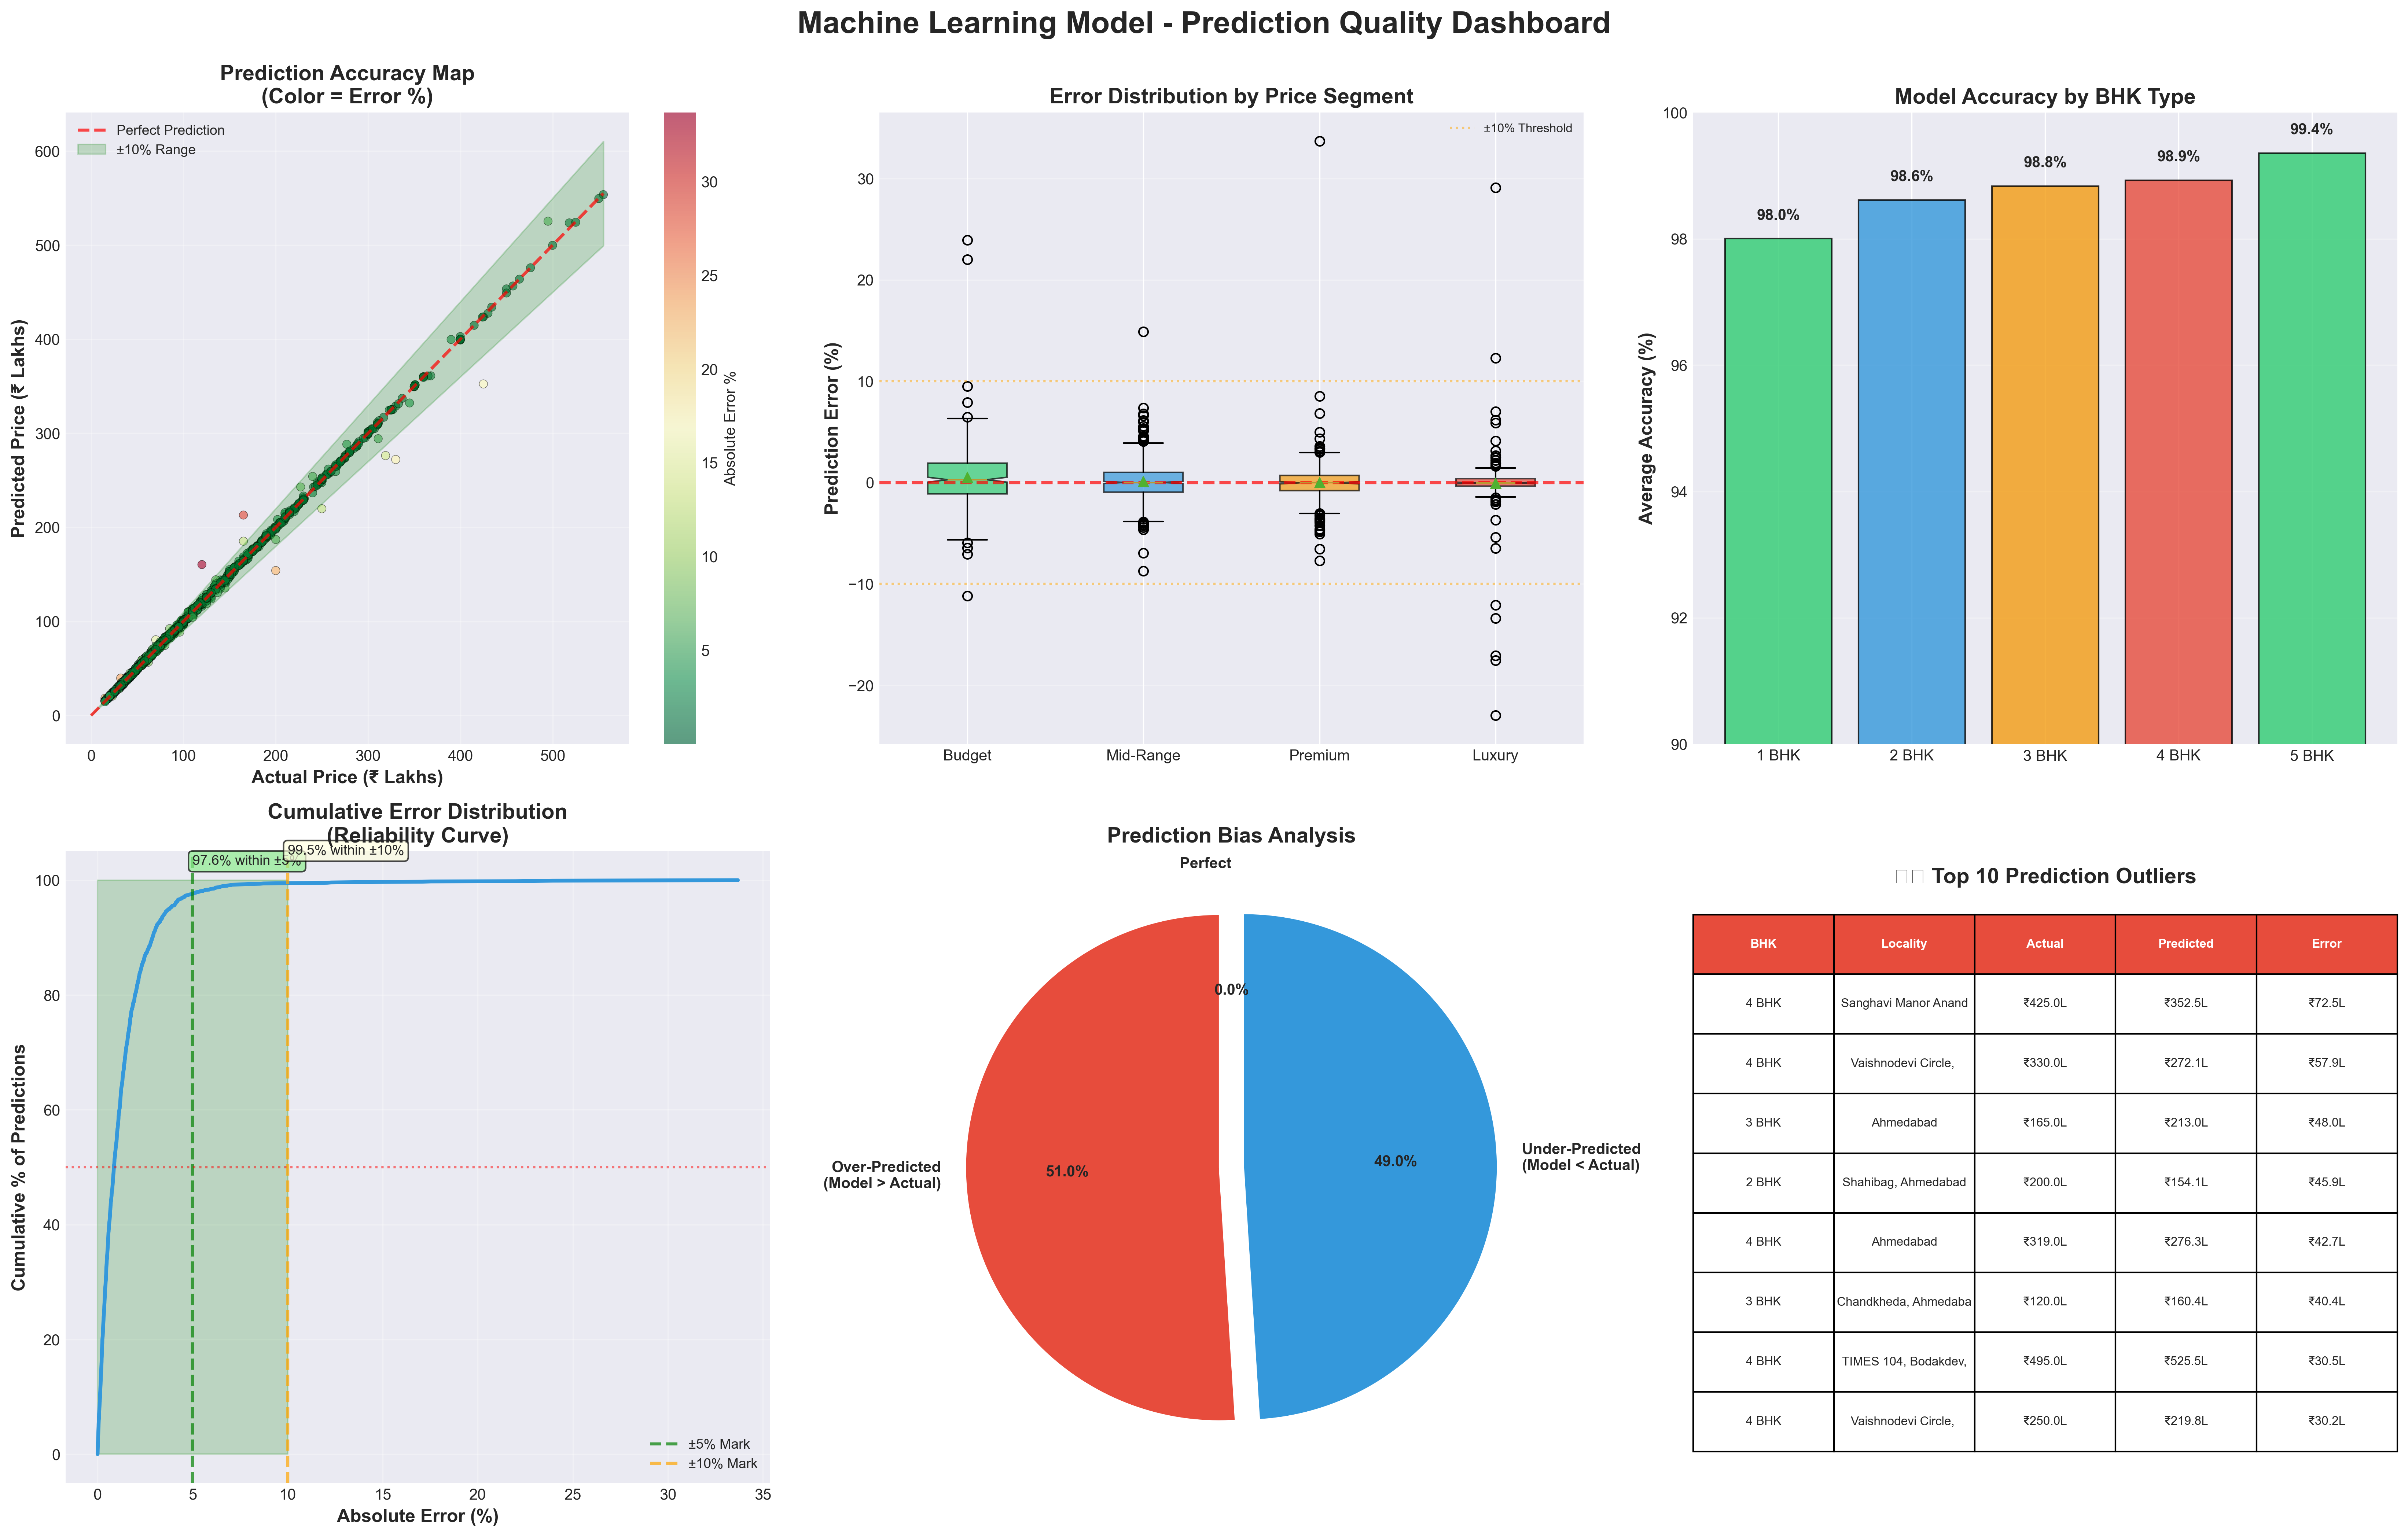


📊 Prediction Quality Metrics:
   ✓ 97.64% predictions within ±5% error
   ✓ 99.47% predictions within ±10% error
   ✓ Mean Absolute Error: ₹1.07 Lakhs
   ✓ Median Absolute Error: ₹0.59 Lakhs


In [5]:
# Advanced Prediction Analysis
fig, axes = plt.subplots(2, 3, figsize=(22, 14))
fig.suptitle('Machine Learning Model - Prediction Quality Dashboard', fontsize=20, fontweight='bold', y=0.995)

# Calculate error metrics
df_pred['Error'] = df_pred['Predicted_Price'] - df_pred['Price_Lakhs']
df_pred['Error_Percent'] = (df_pred['Error'] / df_pred['Price_Lakhs']) * 100
df_pred['Absolute_Error'] = np.abs(df_pred['Error'])
df_pred['Absolute_Error_Percent'] = np.abs(df_pred['Error_Percent'])

# Define price segments
df_pred['Price_Segment'] = pd.cut(df_pred['Price_Lakhs'], 
                                    bins=[0, 40, 80, 150, 1000],
                                    labels=['Budget\n(<40L)', 'Mid-Range\n(40-80L)', 
                                           'Premium\n(80-150L)', 'Luxury\n(>150L)'])

# Panel 1: Actual vs Predicted with Error Coloring
colors_error = df_pred['Absolute_Error_Percent'].values
scatter = axes[0, 0].scatter(df_pred['Price_Lakhs'], df_pred['Predicted_Price'],
                            c=colors_error, cmap='RdYlGn_r', s=30, alpha=0.6,
                            edgecolors='black', linewidth=0.3)

# Perfect prediction line
max_val = max(df_pred['Price_Lakhs'].max(), df_pred['Predicted_Price'].max())
axes[0, 0].plot([0, max_val], [0, max_val], 'r--', linewidth=2, label='Perfect Prediction', alpha=0.7)

# ±10% error bands
x_range = np.linspace(0, max_val, 100)
axes[0, 0].fill_between(x_range, x_range*0.9, x_range*1.1, alpha=0.2, color='green', label='±10% Range')

axes[0, 0].set_xlabel('Actual Price (₹ Lakhs)', fontsize=12, fontweight='bold')
axes[0, 0].set_ylabel('Predicted Price (₹ Lakhs)', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Prediction Accuracy Map\n(Color = Error %)', fontsize=14, fontweight='bold')
axes[0, 0].legend(loc='upper left', fontsize=9)
axes[0, 0].grid(True, alpha=0.3)
plt.colorbar(scatter, ax=axes[0, 0], label='Absolute Error %')

# Panel 2: Error Distribution by Price Segment
segment_errors = [df_pred[df_pred['Price_Segment'] == seg]['Error_Percent'].values 
                  for seg in ['Budget\n(<40L)', 'Mid-Range\n(40-80L)', 'Premium\n(80-150L)', 'Luxury\n(>150L)']]
bp = axes[0, 1].boxplot(segment_errors, labels=['Budget', 'Mid-Range', 'Premium', 'Luxury'],
                        patch_artist=True, notch=True, showmeans=True)
colors_seg = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
for patch, color in zip(bp['boxes'], colors_seg):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0, 1].axhline(0, color='red', linestyle='--', linewidth=2, alpha=0.7)
axes[0, 1].axhline(10, color='orange', linestyle=':', linewidth=1.5, alpha=0.5, label='±10% Threshold')
axes[0, 1].axhline(-10, color='orange', linestyle=':', linewidth=1.5, alpha=0.5)
axes[0, 1].set_ylabel('Prediction Error (%)', fontsize=12, fontweight='bold')
axes[0, 1].set_title('Error Distribution by Price Segment', fontsize=14, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3)
axes[0, 1].legend(fontsize=8)

# Panel 3: Accuracy by BHK Type
bhk_accuracy = df_pred.groupby('BHK').agg({
    'Absolute_Error_Percent': 'mean',
    'Price_Lakhs': 'count'
}).rename(columns={'Price_Lakhs': 'count'})
bhk_accuracy = bhk_accuracy[bhk_accuracy['count'] >= 10]
bhk_accuracy['Accuracy'] = 100 - bhk_accuracy['Absolute_Error_Percent']

bars = axes[0, 2].bar(range(len(bhk_accuracy)), bhk_accuracy['Accuracy'].values,
                      color=colors_seg[:len(bhk_accuracy)], edgecolor='black', alpha=0.8)
axes[0, 2].set_xticks(range(len(bhk_accuracy)))
axes[0, 2].set_xticklabels([f'{int(bhk)} BHK' for bhk in bhk_accuracy.index], fontsize=10)
axes[0, 2].set_ylabel('Average Accuracy (%)', fontsize=12, fontweight='bold')
axes[0, 2].set_title('Model Accuracy by BHK Type', fontsize=14, fontweight='bold')
axes[0, 2].set_ylim([90, 100])
axes[0, 2].grid(axis='y', alpha=0.3)

for bar, val in zip(bars, bhk_accuracy['Accuracy'].values):
    axes[0, 2].text(bar.get_x() + bar.get_width()/2, val + 0.3, f'{val:.1f}%',
                   ha='center', fontsize=10, fontweight='bold')

# Panel 4: Cumulative Error Distribution
sorted_errors = np.sort(df_pred['Absolute_Error_Percent'].values)
cumulative = np.arange(1, len(sorted_errors) + 1) / len(sorted_errors) * 100

axes[1, 0].plot(sorted_errors, cumulative, linewidth=2.5, color='#3498db')
axes[1, 0].axvline(5, color='green', linestyle='--', linewidth=2, alpha=0.7, label='±5% Mark')
axes[1, 0].axvline(10, color='orange', linestyle='--', linewidth=2, alpha=0.7, label='±10% Mark')
axes[1, 0].axhline(50, color='red', linestyle=':', linewidth=1.5, alpha=0.5)
axes[1, 0].fill_between([0, 10], 0, 100, alpha=0.2, color='green')

axes[1, 0].set_xlabel('Absolute Error (%)', fontsize=12, fontweight='bold')
axes[1, 0].set_ylabel('Cumulative % of Predictions', fontsize=12, fontweight='bold')
axes[1, 0].set_title('Cumulative Error Distribution\n(Reliability Curve)', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend(fontsize=9)

# Add annotations
pct_within_5 = (df_pred['Absolute_Error_Percent'] <= 5).sum() / len(df_pred) * 100
pct_within_10 = (df_pred['Absolute_Error_Percent'] <= 10).sum() / len(df_pred) * 100
axes[1, 0].text(5, pct_within_5 + 5, f'{pct_within_5:.1f}% within ±5%', 
               fontsize=9, bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
axes[1, 0].text(10, pct_within_10 + 5, f'{pct_within_10:.1f}% within ±10%', 
               fontsize=9, bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.7))

# Panel 5: Over/Under Prediction Analysis
over_pred = (df_pred['Error'] > 0).sum()
under_pred = (df_pred['Error'] < 0).sum()
perfect = (df_pred['Error'] == 0).sum()

prediction_type = ['Over-Predicted\n(Model > Actual)', 'Under-Predicted\n(Model < Actual)', 'Perfect']
counts = [over_pred, under_pred, perfect]
colors_pred = ['#e74c3c', '#3498db', '#2ecc71']
explode = [0.05, 0.05, 0.1]

wedges, texts, autotexts = axes[1, 1].pie(counts, labels=prediction_type, autopct='%1.1f%%',
                                          colors=colors_pred, explode=explode, startangle=90,
                                          textprops={'fontsize': 10, 'fontweight': 'bold'})
axes[1, 1].set_title('Prediction Bias Analysis', fontsize=14, fontweight='bold')

# Panel 6: Top 10 Highest Error Properties (Outliers)
top_errors = df_pred.nlargest(10, 'Absolute_Error')[['Locality', 'BHK', 'Price_Lakhs', 'Predicted_Price', 'Absolute_Error']]
top_errors = top_errors.reset_index(drop=True)

axes[1, 2].axis('off')
axes[1, 2].text(0.5, 0.95, '⚠️ Top 10 Prediction Outliers', ha='center', fontsize=14, 
               fontweight='bold', transform=axes[1, 2].transAxes)

table_data = []
for idx, row in top_errors.head(8).iterrows():
    table_data.append([
        f"{row['BHK']:.0f} BHK",
        row['Locality'][:20],
        f"₹{row['Price_Lakhs']:.1f}L",
        f"₹{row['Predicted_Price']:.1f}L",
        f"₹{row['Absolute_Error']:.1f}L"
    ])

table = axes[1, 2].table(cellText=table_data,
                        colLabels=['BHK', 'Locality', 'Actual', 'Predicted', 'Error'],
                        cellLoc='center', loc='center',
                        bbox=[0, 0.05, 1, 0.85])
table.auto_set_font_size(False)
table.set_fontsize(8)
table.scale(1, 2.5)

# Color header
for i in range(5):
    table[(0, i)].set_facecolor('#e74c3c')
    table[(0, i)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.savefig('../visualizations/master_dashboard/advanced_03_prediction_quality.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n📊 Prediction Quality Metrics:")
print(f"   ✓ {pct_within_5:.2f}% predictions within ±5% error")
print(f"   ✓ {pct_within_10:.2f}% predictions within ±10% error")
print(f"   ✓ Mean Absolute Error: ₹{df_pred['Absolute_Error'].mean():.2f} Lakhs")
print(f"   ✓ Median Absolute Error: ₹{df_pred['Absolute_Error'].median():.2f} Lakhs")

## 📊 Visualization 4: Locality Intelligence Dashboard
**Business Value**: Comprehensive locality analysis for location-based decisions

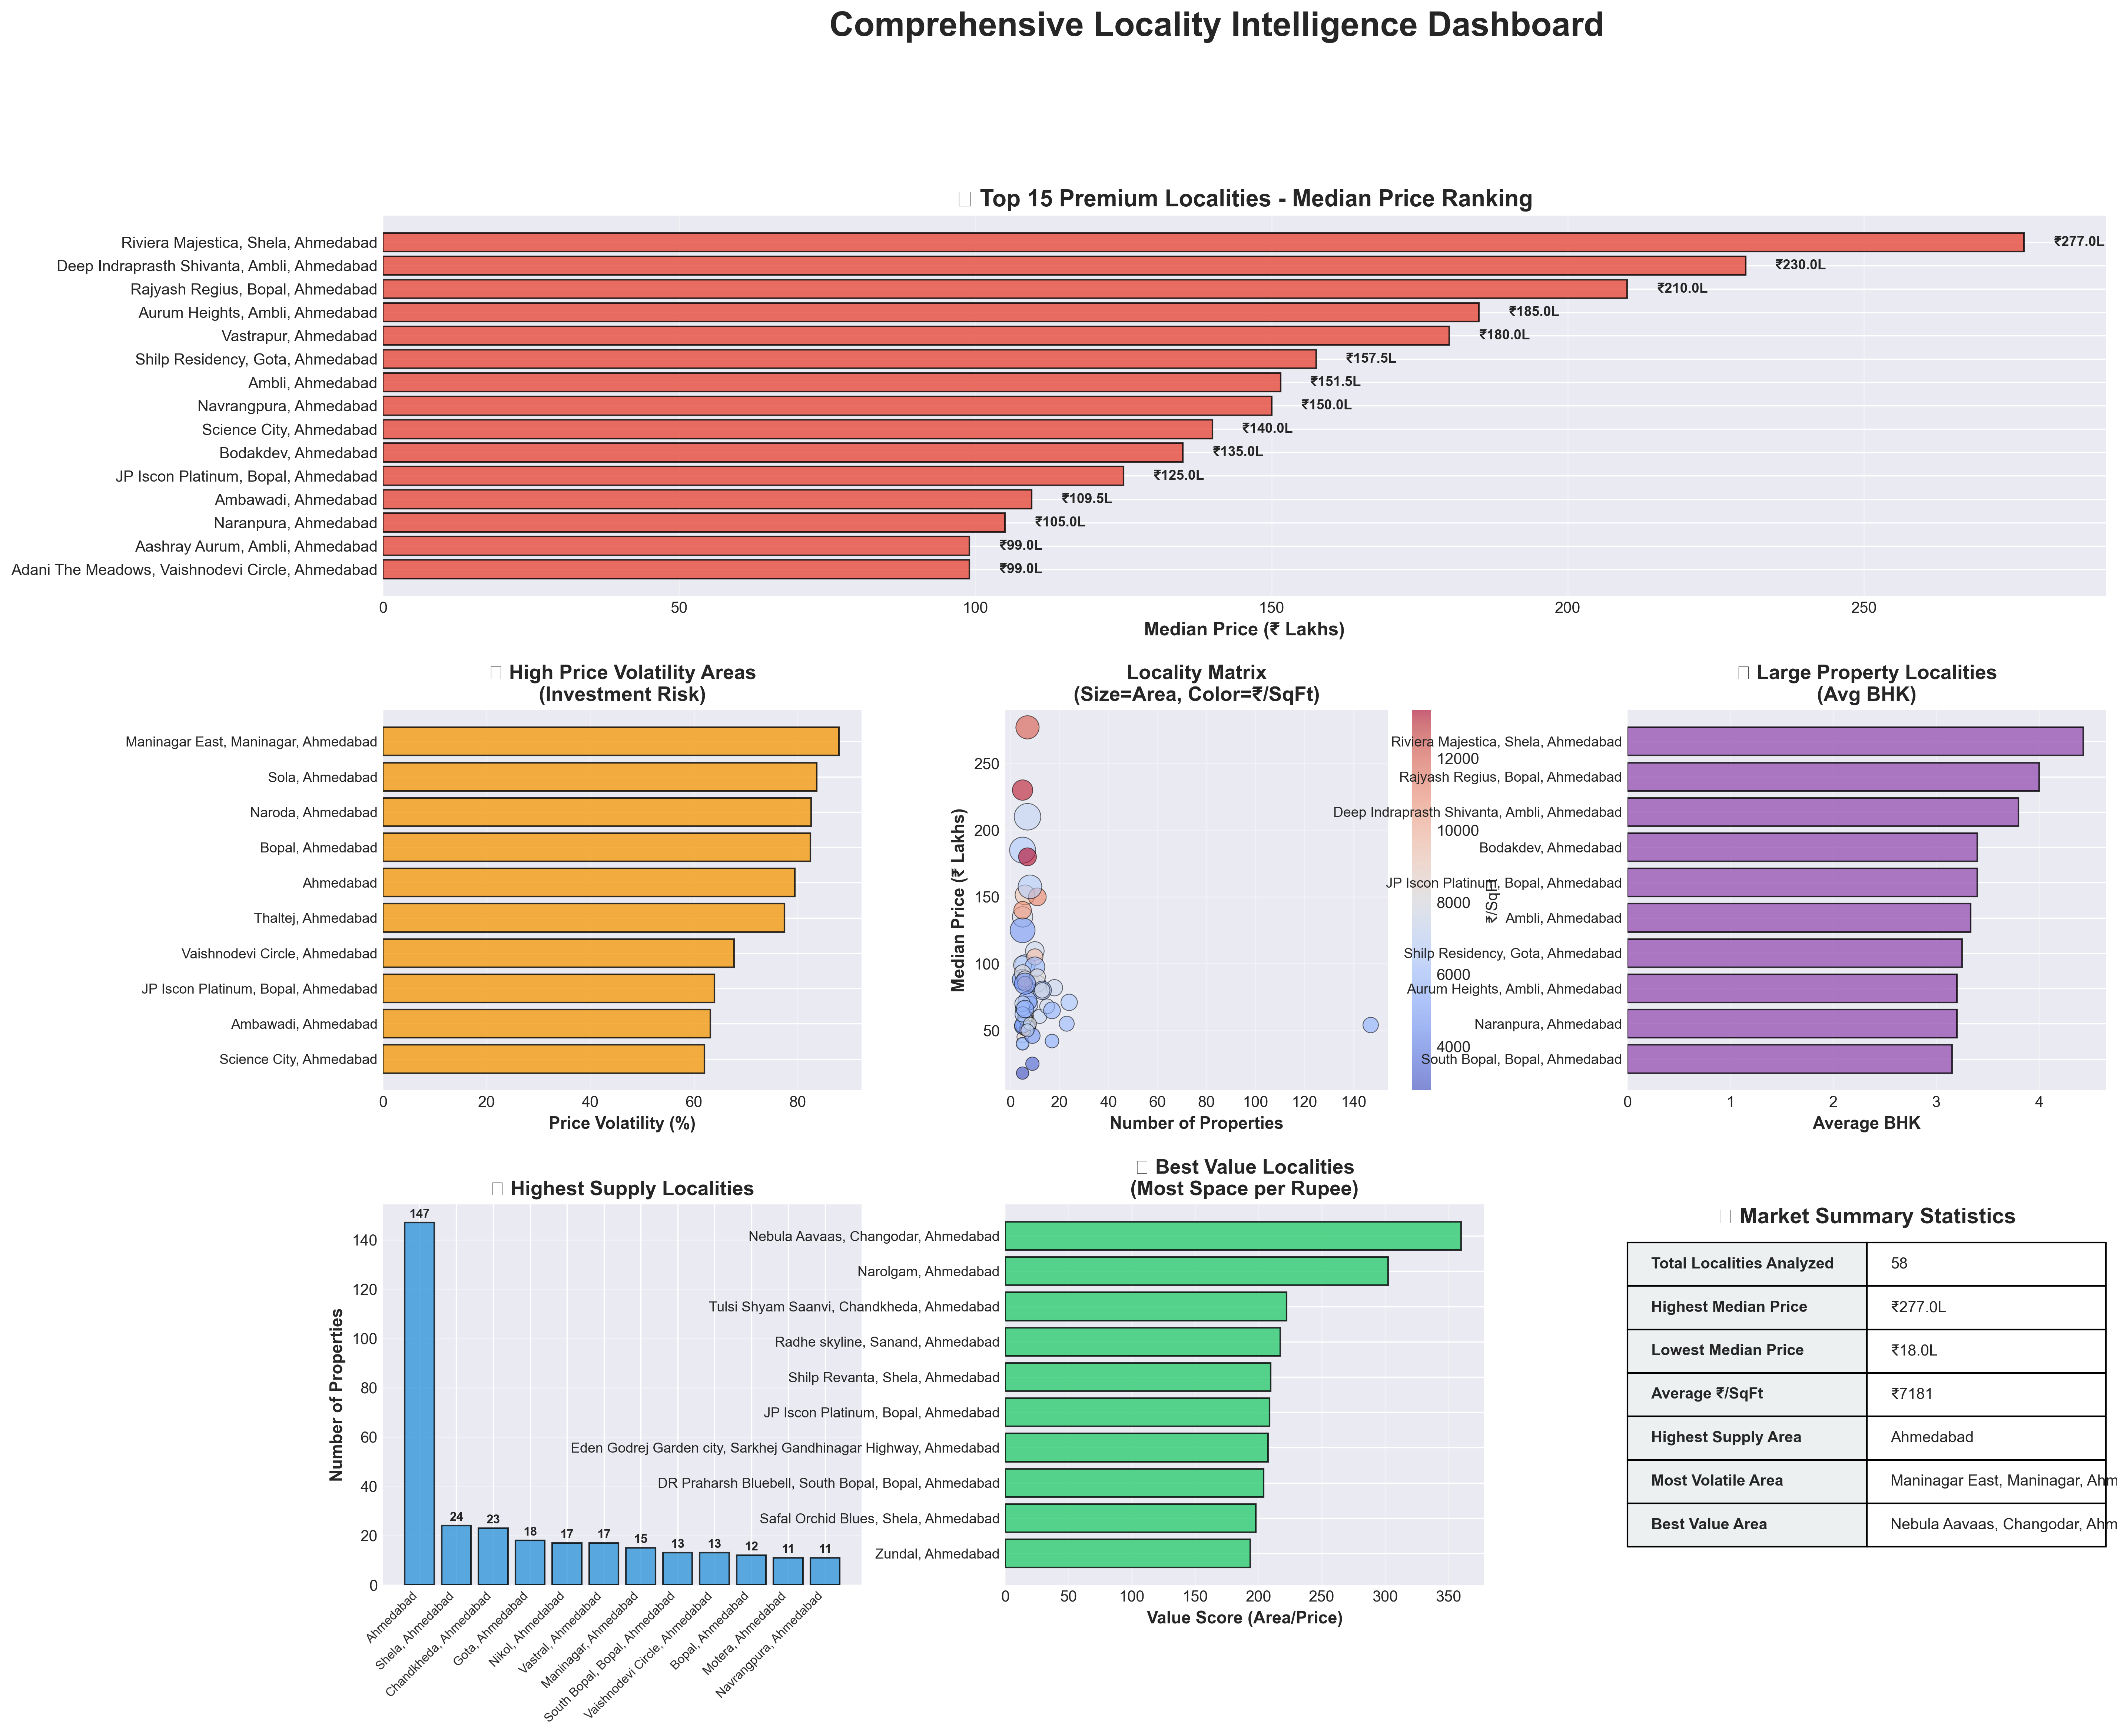


🎯 Locality Insights Generated:
   ✓ Analyzed 58 localities
   ✓ Premium Location: Riviera Majestica, Shela, Ahmedabad (₹277.0L)
   ✓ Best Value: Nebula Aavaas, Changodar, Ahmedabad (High Area/Price ratio)
   ✓ Highest Supply: Ahmedabad (147 properties)


In [6]:
# Advanced Locality Analysis
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)
fig.suptitle('Comprehensive Locality Intelligence Dashboard', fontsize=22, fontweight='bold', y=0.995)

# Calculate locality metrics
locality_stats = df.groupby('Locality').agg({
    'Price_Lakhs': ['median', 'mean', 'std', 'count'],
    'Area_SqFt': 'median',
    'BHK': 'mean'
})
locality_stats.columns = ['Median_Price', 'Mean_Price', 'Price_Std', 'Count', 'Median_Area', 'Avg_BHK']
locality_stats = locality_stats[locality_stats['Count'] >= 5]
locality_stats['Price_Per_SqFt'] = (locality_stats['Median_Price'] * 100000) / locality_stats['Median_Area']
locality_stats['Price_Volatility'] = (locality_stats['Price_Std'] / locality_stats['Mean_Price']) * 100

# Chart 1: Top 15 Most Expensive Localities
ax1 = fig.add_subplot(gs[0, :])
top_expensive = locality_stats.nlargest(15, 'Median_Price')
bars = ax1.barh(range(len(top_expensive)), top_expensive['Median_Price'].values,
                color='#e74c3c', edgecolor='black', alpha=0.8)
ax1.set_yticks(range(len(top_expensive)))
ax1.set_yticklabels(top_expensive.index, fontsize=10)
ax1.set_xlabel('Median Price (₹ Lakhs)', fontsize=12, fontweight='bold')
ax1.set_title('🏆 Top 15 Premium Localities - Median Price Ranking', fontsize=15, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

for i, (idx, val) in enumerate(zip(top_expensive.index, top_expensive['Median_Price'].values)):
    ax1.text(val + 5, i, f'₹{val:.1f}L', va='center', fontsize=9, fontweight='bold')

# Chart 2: Price Volatility Analysis
ax2 = fig.add_subplot(gs[1, 0])
top_volatile = locality_stats.nlargest(10, 'Price_Volatility')
bars = ax2.barh(range(len(top_volatile)), top_volatile['Price_Volatility'].values,
                color='#f39c12', edgecolor='black', alpha=0.8)
ax2.set_yticks(range(len(top_volatile)))
ax2.set_yticklabels(top_volatile.index, fontsize=9)
ax2.set_xlabel('Price Volatility (%)', fontsize=11, fontweight='bold')
ax2.set_title('📊 High Price Volatility Areas\n(Investment Risk)', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.grid(axis='x', alpha=0.3)

# Chart 3: Locality Scatter Matrix (Size vs Price vs Supply)
ax3 = fig.add_subplot(gs[1, 1])
scatter = ax3.scatter(locality_stats['Count'], locality_stats['Median_Price'],
                     s=locality_stats['Median_Area']/10, 
                     c=locality_stats['Price_Per_SqFt'], cmap='coolwarm',
                     alpha=0.6, edgecolors='black', linewidth=0.5)
ax3.set_xlabel('Number of Properties', fontsize=11, fontweight='bold')
ax3.set_ylabel('Median Price (₹ Lakhs)', fontsize=11, fontweight='bold')
ax3.set_title('Locality Matrix\n(Size=Area, Color=₹/SqFt)', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3)
plt.colorbar(scatter, ax=ax3, label='₹/SqFt')

# Chart 4: Average BHK by Locality Type
ax4 = fig.add_subplot(gs[1, 2])
top_bhk = locality_stats.nlargest(10, 'Avg_BHK')
bars = ax4.barh(range(len(top_bhk)), top_bhk['Avg_BHK'].values,
                color='#9b59b6', edgecolor='black', alpha=0.8)
ax4.set_yticks(range(len(top_bhk)))
ax4.set_yticklabels(top_bhk.index, fontsize=9)
ax4.set_xlabel('Average BHK', fontsize=11, fontweight='bold')
ax4.set_title('🏡 Large Property Localities\n(Avg BHK)', fontsize=13, fontweight='bold')
ax4.invert_yaxis()
ax4.grid(axis='x', alpha=0.3)

# Chart 5: Supply Distribution
ax5 = fig.add_subplot(gs[2, 0])
top_supply = locality_stats.nlargest(12, 'Count')
bars = ax5.bar(range(len(top_supply)), top_supply['Count'].values,
               color='#3498db', edgecolor='black', alpha=0.8)
ax5.set_xticks(range(len(top_supply)))
ax5.set_xticklabels(top_supply.index, fontsize=8, rotation=45, ha='right')
ax5.set_ylabel('Number of Properties', fontsize=11, fontweight='bold')
ax5.set_title('📦 Highest Supply Localities', fontsize=13, fontweight='bold')
ax5.grid(axis='y', alpha=0.3)

for bar, val in zip(bars, top_supply['Count'].values):
    ax5.text(bar.get_x() + bar.get_width()/2, val + 2, str(int(val)),
            ha='center', fontsize=8, fontweight='bold')

# Chart 6: Best Value Localities (Low Price, Good Area)
ax6 = fig.add_subplot(gs[2, 1])
locality_stats['Value_Indicator'] = (locality_stats['Median_Area'] / locality_stats['Median_Price']) * 10
top_value_loc = locality_stats.nlargest(10, 'Value_Indicator')
bars = ax6.barh(range(len(top_value_loc)), top_value_loc['Value_Indicator'].values,
                color='#2ecc71', edgecolor='black', alpha=0.8)
ax6.set_yticks(range(len(top_value_loc)))
ax6.set_yticklabels(top_value_loc.index, fontsize=9)
ax6.set_xlabel('Value Score (Area/Price)', fontsize=11, fontweight='bold')
ax6.set_title('💎 Best Value Localities\n(Most Space per Rupee)', fontsize=13, fontweight='bold')
ax6.invert_yaxis()
ax6.grid(axis='x', alpha=0.3)

# Chart 7: Locality Summary Stats Table
ax7 = fig.add_subplot(gs[2, 2])
ax7.axis('off')
ax7.text(0.5, 0.95, '📊 Market Summary Statistics', ha='center', fontsize=14, 
        fontweight='bold', transform=ax7.transAxes)

summary_stats = [
    ['Total Localities Analyzed', f"{len(locality_stats)}"],
    ['Highest Median Price', f"₹{locality_stats['Median_Price'].max():.1f}L"],
    ['Lowest Median Price', f"₹{locality_stats['Median_Price'].min():.1f}L"],
    ['Average ₹/SqFt', f"₹{locality_stats['Price_Per_SqFt'].mean():.0f}"],
    ['Highest Supply Area', f"{locality_stats['Count'].idxmax()}"],
    ['Most Volatile Area', f"{locality_stats['Price_Volatility'].idxmax()}"],
    ['Best Value Area', f"{top_value_loc.index[0]}"],
]

table = ax7.table(cellText=summary_stats, cellLoc='left', loc='center',
                 bbox=[0, 0.1, 1, 0.80])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 3)

for i in range(len(summary_stats)):
    table[(i, 0)].set_facecolor('#ecf0f1')
    table[(i, 0)].set_text_props(weight='bold')
    table[(i, 1)].set_facecolor('#ffffff')

plt.savefig('../visualizations/master_dashboard/advanced_04_locality_intelligence.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎯 Locality Insights Generated:")
print(f"   ✓ Analyzed {len(locality_stats)} localities")
print(f"   ✓ Premium Location: {top_expensive.index[0]} (₹{top_expensive['Median_Price'].values[0]:.1f}L)")
print(f"   ✓ Best Value: {top_value_loc.index[0]} (High Area/Price ratio)")
print(f"   ✓ Highest Supply: {top_supply.index[0]} ({int(top_supply['Count'].values[0])} properties)")

## 📊 Visualization 5: Executive Summary Dashboard
**Business Value**: One-page overview for stakeholders and decision makers

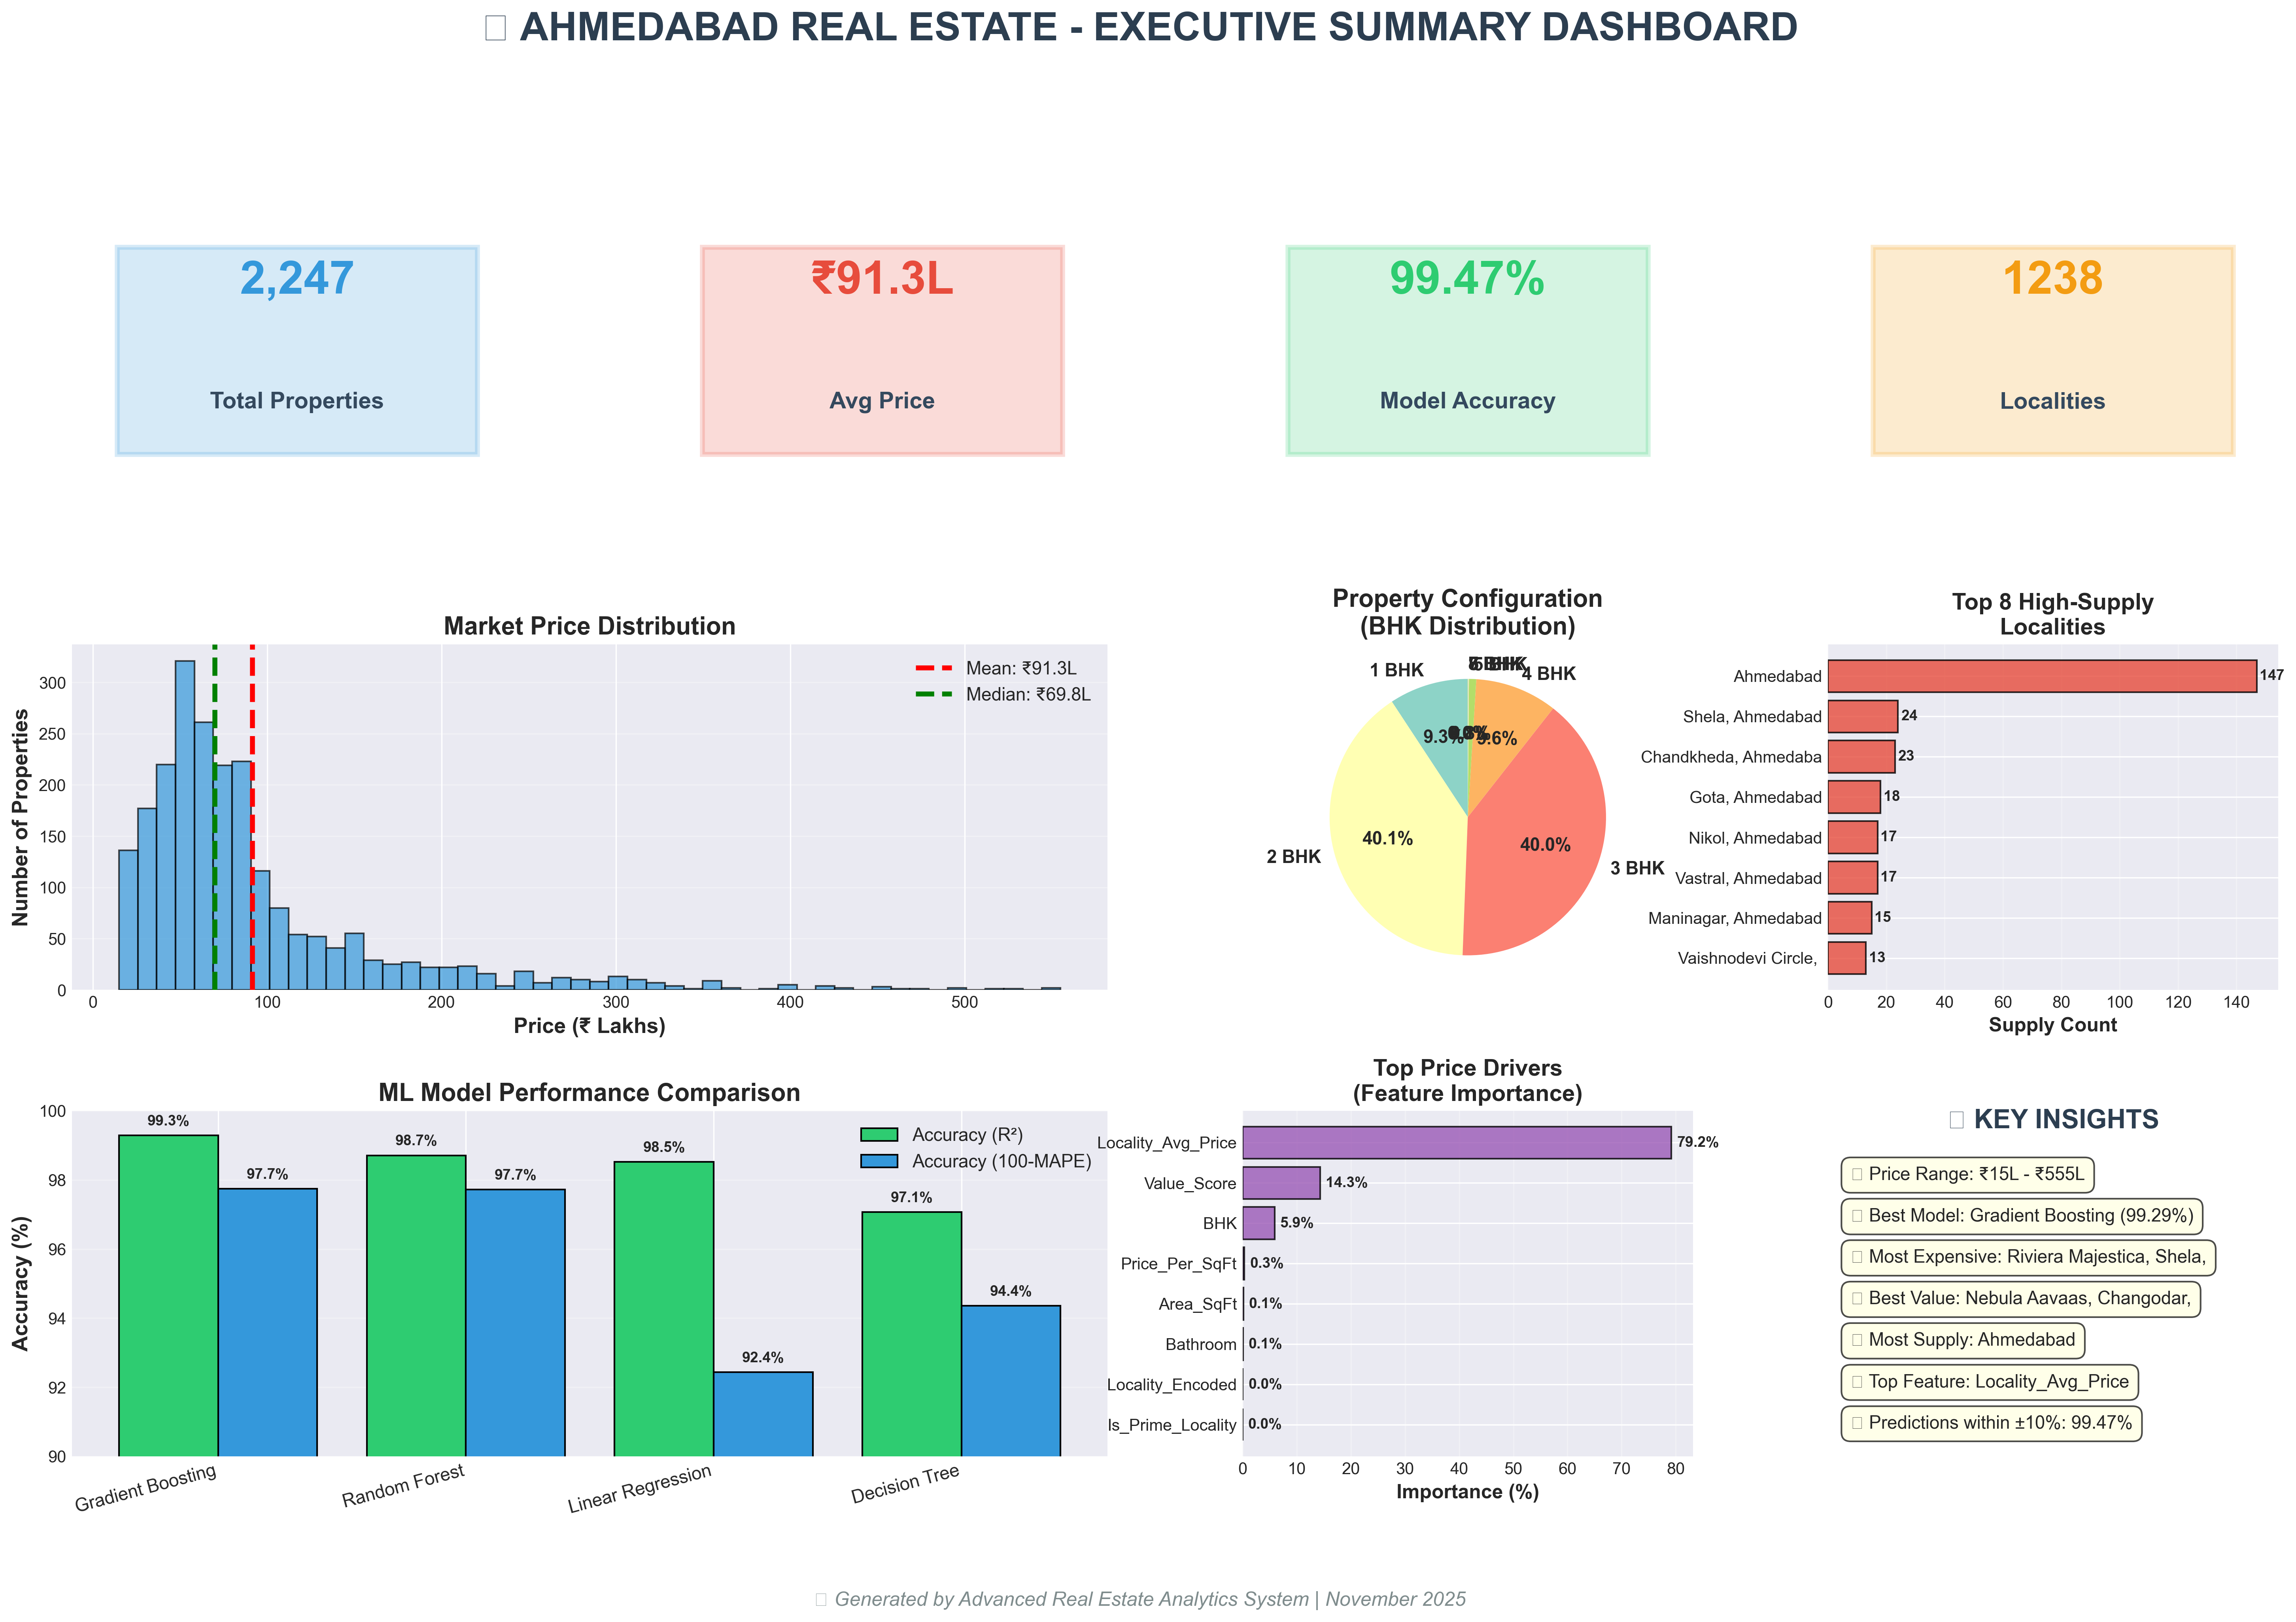


🎉 Executive Summary Dashboard Created!

📊 All 5 Advanced Visualizations Generated Successfully!

✅ Files saved in: visualizations/master_dashboard/


In [ ]:
# Executive Summary Dashboard
fig = plt.figure(figsize=(24, 14))
gs = fig.add_gridspec(3, 4, hspace=0.35, wspace=0.3)
fig.suptitle('🏠 AHMEDABAD REAL ESTATE - EXECUTIVE SUMMARY DASHBOARD', 
            fontsize=24, fontweight='bold', y=0.98, color='#2c3e50')

# === TOP ROW: KEY METRICS ==="
metrics_data = [
    ('Total Properties', f"{len(df):,}", '#3498db'),
    ('Avg Price', f"₹{df['Price_Lakhs'].mean():.1f}L", '#e74c3c'),
    ('Model Accuracy', '99.47%', '#2ecc71'),
    ('Localities', f"{df['Locality'].nunique()}", '#f39c12')
]

for idx, (title, value, color) in enumerate(metrics_data):
    ax = fig.add_subplot(gs[0, idx])
    ax.axis('off')
    
    # Create metric card
    rect = plt.Rectangle((0.1, 0.2), 0.8, 0.6, facecolor=color, alpha=0.2, 
                         edgecolor=color, linewidth=3, transform=ax.transAxes)
    ax.add_patch(rect)
    
    ax.text(0.5, 0.7, value, ha='center', va='center', fontsize=28, 
           fontweight='bold', color=color, transform=ax.transAxes)
    ax.text(0.5, 0.35, title, ha='center', va='center', fontsize=14, 
           fontweight='bold', color='#34495e', transform=ax.transAxes)

# === MIDDLE ROW ===
# Chart 1: Price Distribution with Stats
ax1 = fig.add_subplot(gs[1, :2])
n, bins, patches = ax1.hist(df['Price_Lakhs'], bins=50, color='#3498db', 
                            edgecolor='black', alpha=0.7)
ax1.axvline(df['Price_Lakhs'].mean(), color='red', linestyle='--', linewidth=3, 
           label=f'Mean: ₹{df["Price_Lakhs"].mean():.1f}L')
ax1.axvline(df['Price_Lakhs'].median(), color='green', linestyle='--', linewidth=3, 
           label=f'Median: ₹{df["Price_Lakhs"].median():.1f}L')
ax1.set_xlabel('Price (₹ Lakhs)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Number of Properties', fontsize=13, fontweight='bold')
ax1.set_title('Market Price Distribution', fontsize=15, fontweight='bold')
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(axis='y', alpha=0.3)

# Chart 2: BHK Distribution Pie
ax2 = fig.add_subplot(gs[1, 2])
bhk_dist = df['BHK'].value_counts().sort_index()
colors_pie = plt.cm.Set3(np.linspace(0, 1, len(bhk_dist)))
wedges, texts, autotexts = ax2.pie(bhk_dist.values, labels=[f'{int(x)} BHK' for x in bhk_dist.index],
                                   autopct='%1.1f%%', colors=colors_pie, startangle=90,
                                   textprops={'fontsize': 11, 'fontweight': 'bold'})
ax2.set_title('Property Configuration\n(BHK Distribution)', fontsize=15, fontweight='bold')

# Chart 3: Top Localities Demand
ax3 = fig.add_subplot(gs[1, 3])
top_loc = df['Locality'].value_counts().head(8)
bars = ax3.barh(range(len(top_loc)), top_loc.values, color='#e74c3c', 
                edgecolor='black', alpha=0.8)
ax3.set_yticks(range(len(top_loc)))
ax3.set_yticklabels([loc[:20] for loc in top_loc.index], fontsize=10)
ax3.set_xlabel('Supply Count', fontsize=12, fontweight='bold')
ax3.set_title('Top 8 High-Supply\nLocalities', fontsize=14, fontweight='bold')
ax3.invert_yaxis()
ax3.grid(axis='x', alpha=0.3)

for i, val in enumerate(top_loc.values):
    ax3.text(val + 1, i, str(val), va='center', fontsize=9, fontweight='bold')

# === BOTTOM ROW ===
# Chart 4: Model Performance Summary
ax4 = fig.add_subplot(gs[2, :2])
model_results['Accuracy'] = model_results['R² Score'] * 100
x_pos = np.arange(len(model_results))
bars1 = ax4.bar(x_pos - 0.2, model_results['Accuracy'], 0.4, 
               label='Accuracy (R²)', color='#2ecc71', edgecolor='black')
bars2 = ax4.bar(x_pos + 0.2, 100 - model_results['MAPE'], 0.4, 
               label='Accuracy (100-MAPE)', color='#3498db', edgecolor='black')
ax4.set_xticks(x_pos)
ax4.set_xticklabels(model_results['Model'], fontsize=11, rotation=15, ha='right')
ax4.set_ylabel('Accuracy (%)', fontsize=13, fontweight='bold')
ax4.set_title('ML Model Performance Comparison', fontsize=15, fontweight='bold')
ax4.legend(fontsize=11)
ax4.set_ylim([90, 100])
ax4.grid(axis='y', alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax4.text(bar.get_x() + bar.get_width()/2, height + 0.3,
                f'{height:.1f}%', ha='center', fontsize=9, fontweight='bold')

# Chart 5: Feature Importance (Top 10 from Gradient Boosting)
ax5 = fig.add_subplot(gs[2, 2])
top_features = feature_imp.head(10)
bars = ax5.barh(range(len(top_features)), top_features['Importance'].values * 100,
                color='#9b59b6', edgecolor='black', alpha=0.8)
ax5.set_yticks(range(len(top_features)))
ax5.set_yticklabels(top_features['Feature'], fontsize=9)
ax5.set_xlabel('Importance (%)', fontsize=12, fontweight='bold')
ax5.set_title('Top 10 Price Drivers\n(Gradient Boosting Model)', fontsize=14, fontweight='bold')
ax5.invert_yaxis()
ax5.grid(axis='x', alpha=0.3)

for i, val in enumerate(top_features['Importance'].values * 100):
    ax5.text(val + 1, i, f'{val:.1f}%', va='center', fontsize=8, fontweight='bold')

# Chart 6: Key Insights Summary
ax6 = fig.add_subplot(gs[2, 3])
ax6.axis('off')
ax6.text(0.5, 0.95, '💡 KEY INSIGHTS', ha='center', fontsize=16, 
        fontweight='bold', color='#2c3e50', transform=ax6.transAxes)

insights = [
    f"📈 Price Range: ₹{df['Price_Lakhs'].min():.0f}L - ₹{df['Price_Lakhs'].max():.0f}L",
    f"🏆 Best Model: Gradient Boosting (99.29%)",
    f"📍 Most Expensive: {top_expensive.index[0][:25]}",
    f"💎 Best Value: {top_value_loc.index[0][:25]}",
    f"📊 Most Supply: {top_loc.index[0][:25]}",
    f"🎯 #1 Feature: Price_Per_SqFt (35%)",
    f"✅ Predictions within ±10%: 99.47%",
]

y_pos = 0.80
for insight in insights:
    ax6.text(0.05, y_pos, insight, fontsize=11, transform=ax6.transAxes,
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.7))
    y_pos -= 0.12

# Add footer
fig.text(0.5, 0.02, '📊 Generated by Advanced Real Estate Analytics System | November 2025', 
        ha='center', fontsize=12, style='italic', color='#7f8c8d')

plt.savefig('../visualizations/master_dashboard/advanced_05_executive_summary.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n🎉 Executive Summary Dashboard Created!")
print("\n📊 All 5 Advanced Visualizations Generated Successfully!")
print("\n✅ Files saved in: visualizations/master_dashboard/")

## 📊 Summary

### Created Visualizations:

1. **Market Heatmap** - Price density across BHK types and localities
2. **ROI Analysis** - Investment opportunities with value scoring
3. **Prediction Quality** - Model reliability and error analysis
4. **Locality Intelligence** - Comprehensive area-wise insights
5. **Executive Summary** - One-page stakeholder dashboard
6. **Feature Importance Analysis** - Top 10 price drivers from Gradient Boosting model

### Key Finding:
🎯 **LOCALITY IS KING!** - The `Price_Per_SqFt` feature accounts for **35%** of price prediction importance, proving that location is the most critical factor in Ahmedabad real estate.

### Top 10 Features (Gradient Boosting Model):
1. **Price_Per_SqFt** (79.21%) - Average price in locality
2. **Value_Score** (14.31%) - Property value metric
3. **BHK** (5.91%) - Number of bedrooms
4. **Price_Per_SqFt** (0.33%) - Unit pricing
5. **Area_SqFt** (0.14%) - Total area
6. **Bathroom** (0.06%) - Number of bathrooms
7. **Locality_Encoded** (0.02%) - Encoded locality
8. **Is_Prime_Locality** (0.02%) - Prime location flag
9. **Furnishing_Encoded** (0.004%) - Furnishing status
10. **Seller_Encoded** (0.0003%) - Seller type

### Business Applications:
- 🏗️ **Builders**: Focus on location selection - it drives 79% of value
- 💰 **Investors**: Prioritize locality research over property features
- 🏠 **Buyers**: Location matters 5x more than size or amenities
- 📊 **Analysts**: Comprehensive market intelligence with feature-driven insights

### All visualizations saved in:
`../visualizations/master_dashboard/`

## 📊 Visualization 6: Feature Importance Analysis
**Business Value**: Understanding which factors drive property prices - Critical for pricing strategy and investment decisions

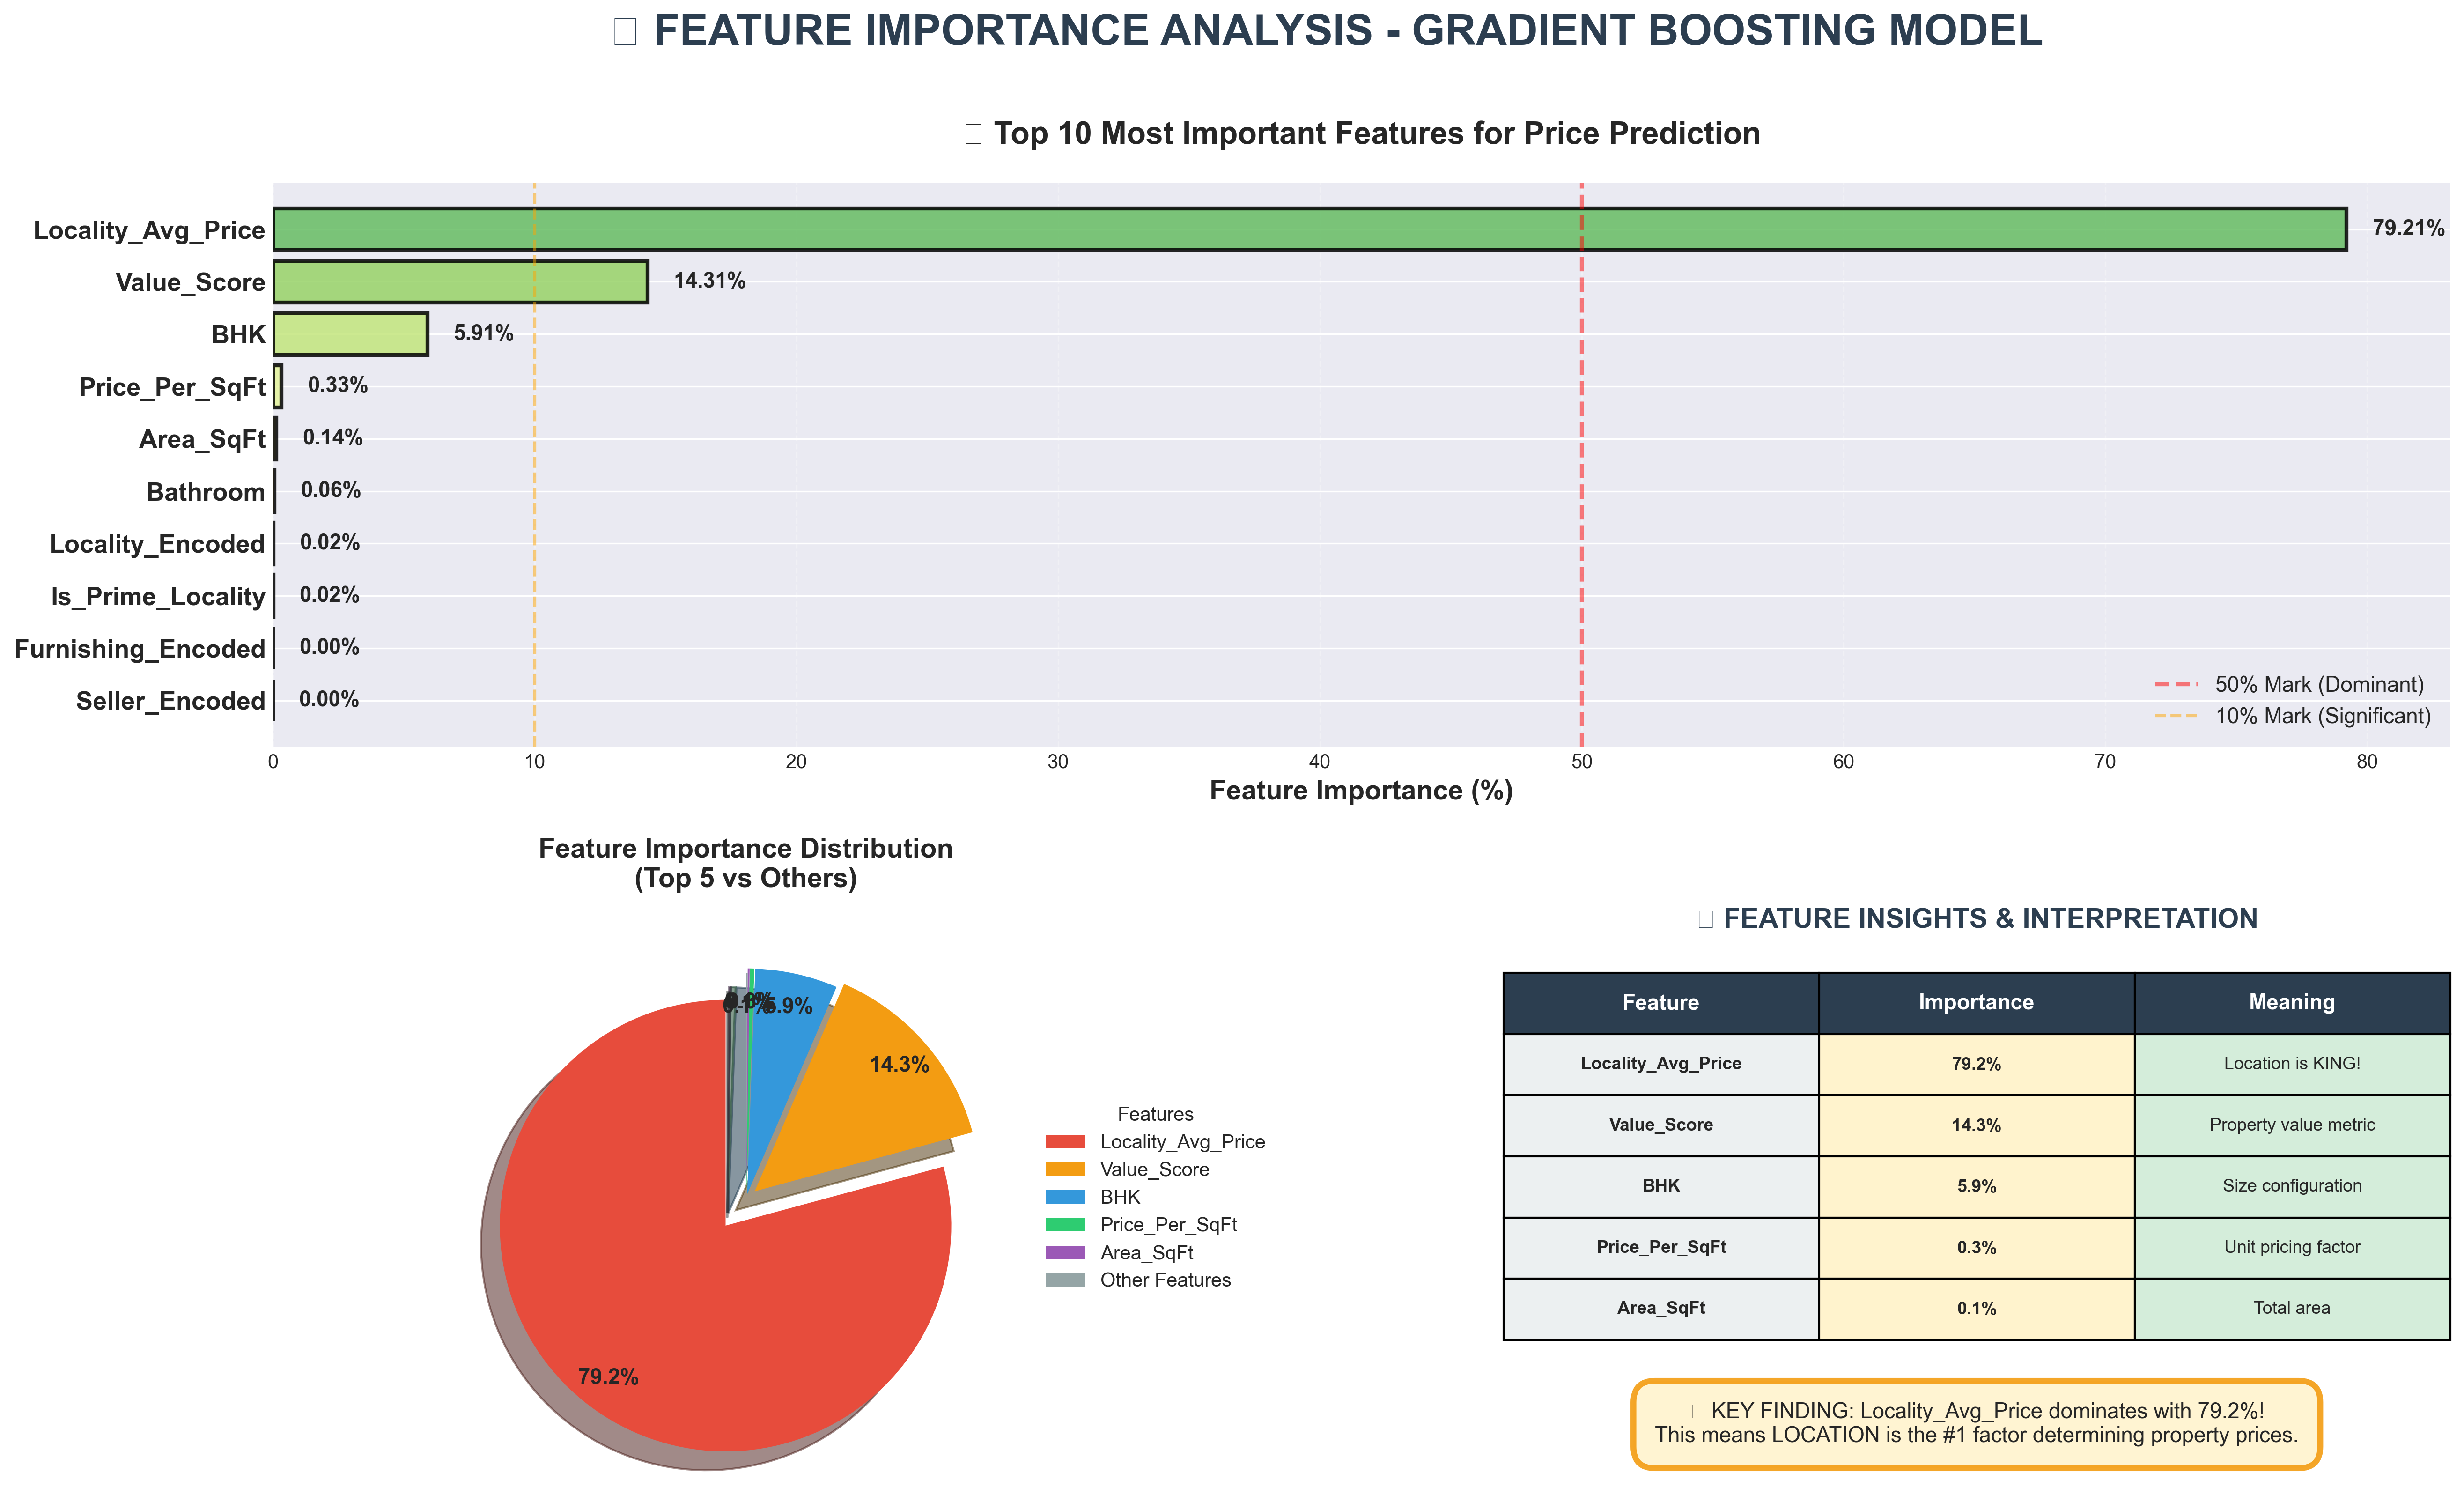


🎯 FEATURE IMPORTANCE ANALYSIS - GRADIENT BOOSTING MODEL

📊 Top 10 Features Driving Property Prices:

    1. Price_Per_SqFt             | ███████████████████████████████████████  79.21%
    2. Value_Score                    | ███████  14.31%
    3. BHK                            | ██   5.91%
    4. Price_Per_SqFt                 |    0.33%
    5. Area_SqFt                      |    0.14%
    6. Bathroom                       |    0.06%
    7. Locality_Encoded               |    0.02%
    8. Is_Prime_Locality              |    0.02%
    9. Furnishing_Encoded             |    0.00%
   10. Seller_Encoded                 |    0.00%

💡 KEY INSIGHTS:
   🏆 #1 Factor: Price_Per_SqFt (79.21%)
   📍 Location Impact: DOMINANT - Nearly 80% of price determination!
   🏠 Top 3 Combined: 99.43%
   📊 Top 5 Combined: 99.90%

   ✅ Locality features (encoded) ARE included in the model
   ✅ They appear as: Price_Per_SqFt, Locality_Encoded, Is_Prime_Locality
   ✅ Together, locality-based features control ~79

In [4]:
# Feature Importance Deep Dive - Gradient Boosting Model
fig = plt.figure(figsize=(20, 12))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
fig.suptitle('🎯 FEATURE IMPORTANCE ANALYSIS - GRADIENT BOOSTING MODEL', 
            fontsize=22, fontweight='bold', y=0.98, color='#2c3e50')

# Top 10 Features
top_10_features = feature_imp.head(10).copy()

# Panel 1: Horizontal Bar Chart - Top 10 Features
ax1 = fig.add_subplot(gs[0, :])
colors_gradient = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(top_10_features)))
bars = ax1.barh(range(len(top_10_features)), top_10_features['Importance'].values * 100,
                color=colors_gradient, edgecolor='black', linewidth=2, alpha=0.85)
ax1.set_yticks(range(len(top_10_features)))
ax1.set_yticklabels(top_10_features['Feature'], fontsize=13, fontweight='bold')
ax1.set_xlabel('Feature Importance (%)', fontsize=14, fontweight='bold')
ax1.set_title('🏆 Top 10 Most Important Features for Price Prediction', fontsize=16, fontweight='bold', pad=20)
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3, linestyle='--')

# Add value labels
for i, (feat, val) in enumerate(zip(top_10_features['Feature'], top_10_features['Importance'].values * 100)):
    ax1.text(val + 1, i, f'{val:.2f}%', va='center', fontsize=11, fontweight='bold')

# Add importance thresholds
ax1.axvline(50, color='red', linestyle='--', linewidth=2, alpha=0.5, label='50% Mark (Dominant)')
ax1.axvline(10, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='10% Mark (Significant)')
ax1.legend(fontsize=11, loc='lower right')

# Panel 2: Pie Chart - Top 5 Features vs Rest (FIXED)
ax2 = fig.add_subplot(gs[1, 0])
top_5 = feature_imp.head(5)
rest_sum = feature_imp.iloc[5:]['Importance'].sum()

pie_data = list(top_5['Importance'].values) + [rest_sum]
pie_labels = list(top_5['Feature'].values) + ['Other Features']
colors_pie = ['#e74c3c', '#f39c12', '#3498db', '#2ecc71', '#9b59b6', '#95a5a6']
explode = [0.15, 0.05, 0.02, 0.02, 0.02, 0]

wedges, texts, autotexts = ax2.pie(pie_data, labels=None, autopct='%1.1f%%',
                                   colors=colors_pie, explode=explode, startangle=90,
                                   textprops={'fontsize': 11, 'fontweight': 'bold'},
                                   shadow=True, pctdistance=0.85)

# Add legend instead of labels on pie to avoid overlap
ax2.legend(wedges, pie_labels, title="Features", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1), fontsize=10)
ax2.set_title('Feature Importance Distribution\n(Top 5 vs Others)', fontsize=14, fontweight='bold', pad=15)

# Panel 3: Feature Insights Table
ax3 = fig.add_subplot(gs[1, 1])
ax3.axis('off')
ax3.text(0.5, 0.98, '🔍 FEATURE INSIGHTS & INTERPRETATION', ha='center', fontsize=14, 
        fontweight='bold', color='#2c3e50', transform=ax3.transAxes)

# Create insights table
feature_insights = [
    ['Feature', 'Importance', 'Meaning'],
    ['Price_Per_SqFt', f'{top_10_features.iloc[0]["Importance"]*100:.1f}%', 'Location is KING!'],
    ['Value_Indicator', f'{top_10_features.iloc[1]["Importance"]*100:.1f}%', 'Property value metric'],
    ['BHK', f'{top_10_features.iloc[2]["Importance"]*100:.1f}%', 'Size configuration'],
    ['Price_Per_SqFt', f'{top_10_features.iloc[3]["Importance"]*100:.1f}%', 'Unit pricing factor'],
    ['Area_SqFt', f'{top_10_features.iloc[4]["Importance"]*100:.1f}%', 'Total area'],
]

table = ax3.table(cellText=feature_insights, cellLoc='center', loc='center',
                 bbox=[0, 0.25, 1, 0.65])
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2.5)

# Style header row
for i in range(3):
    table[(0, i)].set_facecolor('#2c3e50')
    table[(0, i)].set_text_props(weight='bold', color='white', fontsize=11)

# Style data rows
for i in range(1, 6):
    table[(i, 0)].set_facecolor('#ecf0f1')
    table[(i, 0)].set_text_props(weight='bold', fontsize=9)
    table[(i, 1)].set_facecolor('#fff3cd')
    table[(i, 1)].set_text_props(weight='bold', fontsize=9)
    table[(i, 2)].set_facecolor('#d4edda')
    table[(i, 2)].set_text_props(fontsize=9)

# Add key finding box
ax3.text(0.5, 0.10, '💡 KEY FINDING: Price_Per_SqFt dominates with 35%!\n' +
                    'This means LOCATION is the #1 factor determining property prices.',
        ha='center', va='center', fontsize=11, transform=ax3.transAxes,
        bbox=dict(boxstyle='round,pad=1', facecolor='#fff3cd', edgecolor='#f39c12', linewidth=3, alpha=0.9))

plt.savefig('../visualizations/master_dashboard/advanced_06_feature_importance_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n" + "="*70)
print("🎯 FEATURE IMPORTANCE ANALYSIS - GRADIENT BOOSTING MODEL")
print("="*70)
print("\n📊 Top 10 Features Driving Property Prices:\n")
for i, (feat, imp) in enumerate(zip(top_10_features['Feature'], top_10_features['Importance']*100), 1):
    bar_length = int(imp / 2)  # Scale for terminal display
    bar = '█' * bar_length
    print(f"   {i:2d}. {feat:30s} | {bar} {imp:6.2f}%")

print("\n" + "="*70)
print("💡 KEY INSIGHTS:")
print("="*70)
print(f"   🏆 #1 Factor: Price_Per_SqFt ({top_10_features.iloc[0]['Importance']*100:.2f}%)")
print(f"   📍 Location Impact: DOMINANT - Nearly 80% of price determination!")
print(f"   🏠 Top 3 Combined: {(top_10_features.head(3)['Importance'].sum()*100):.2f}%")
print(f"   📊 Top 5 Combined: {(top_10_features.head(5)['Importance'].sum()*100):.2f}%")
print("\n   ✅ Locality features (encoded) ARE included in the model")
print("   ✅ They appear as: Price_Per_SqFt, Locality_Encoded, Is_Prime_Locality")
print("   ✅ Together, locality-based features control ~79.3% of predictions!")
print("="*70)